<a href="https://colab.research.google.com/github/Ganesh-VG/Email-Campaign-Effectiveness-Prediction/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Email Campaign Effectiveness Prediction**    -



##### **Project Type**    - Data Analysis and Machine Learning
##### **Contribution**    - Individual

# **Project Summary -**

This project leverages machine learning to optimize email marketing by analyzing recipient interactions and predicting engagement patterns. By categorizing emails as ignored, read, or acknowledged, the model identifies key factors influencing recipient behavior, such as subject lines, content, timing, and user actions. This enables smarter audience segmentation, ensuring tailored content delivery for improved engagement and conversions. The initiative aims to enhance open rates, click-through rates, and lead generation, ultimately helping SMBs maximize marketing efficiency and strengthen customer relationships through data-driven insights and personalized strategies.

# **GitHub Link -**

https://github.com/Ganesh-VG/Email-Campaign-Effectiveness-Prediction

# **Problem Statement**


- **Low Engagement Rates** ➡ Many SMBs struggle with low open and click-through rates, leading to ineffective email campaigns.

- **Lack of Recipient Insights** ➡ Businesses lack data-driven methods to analyze and predict recipient behavior (ignored, read, acknowledged).

- **Ineffective Audience Segmentation** ➡ Poorly segmented email lists result in irrelevant content delivery, reducing engagement and conversions.

- **Limited Personalization** ➡ Generic email campaigns fail to resonate with diverse recipient preferences, leading to lower response rates.

- **Wasted Marketing Efforts** ➡ Inefficient targeting leads to resource wastage and missed opportunities for customer acquisition and retention.

- **Difficulty in Optimizing Email Strategies** ➡ Without machine learning insights, businesses struggle to refine content, timing, and messaging for better results.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### About the Dataset

This dataset contains information about email marketing campaigns, including details about email content, recipient engagement, and metadata. The goal is to analyze and predict recipient behavior based on various email attributes.

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Dataset Loading

In [ ]:
# Load Dataset
csv_url_storedata = "https://drive.google.com/uc?export=download&id=1Aj9yrUaIAiJIGizgyCOXBnxOQixNjaTD"
df = pd.read_csv(csv_url_storedata)

### Dataset First View

In [ ]:
# Dataset First Look
df.head(10)

Email_ID  Email_Type  Subject_Hotness_Score  Email_Source_Type  \
0  EMA00081000034500           1                    2.2                  2   
1  EMA00081000045360           2                    2.1                  1   
2  EMA00081000066290           2                    0.1                  1   
3  EMA00081000076560           1                    3.0                  2   
4  EMA00081000109720           1                    0.0                  2   
5  EMA00081000131660           1                    1.5                  1   
6  EMA00081000160500           1                    3.2                  1   
7  EMA00081000269630           1                    0.7                  2   
8  EMA00081000287790           1                    2.0                  1   
9  EMA00081000367310           2                    0.5                  1   

  Customer_Location  Email_Campaign_Type  Total_Past_Communications  \
0                 E                    2                       33.0   
1               NaN                    2                       15.0   
2                 B                    3                       36.0   
3                 E                    2                       25.0   
4                 C                    3                       18.0   
5                 G                    2                        NaN   
6                 E                    2                       34.0   
7                 G                    2                       21.0   
8                 G                    2                        NaN   
9                 G                    2                       40.0   

   Time_Email_sent_Category  Word_Count  Total_Links  Total_Images  \
0                         1         440          8.0           0.0   
1                         2         504          5.0           0.0   
2                         2         962          5.0           0.0   
3                         2         610         16.0           0.0   
4                         2         947          4.0           0.0   
5                         2         416         11.0           0.0   
6                         3         116          4.0           0.0   
7                         2        1241          6.0           2.0   
8                         3         655         11.0           4.0   
9                         3         655         11.0           0.0   

   Email_Status  
0             0  
1             0  
2             1  
3             0  
4             0  
5             0  
6             0  
7             0  
8             0  
9             0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Number of rows in dataframe:", df.shape[0])
print("Number of columns in dataframe:", df.shape[1])

Number of rows in dataframe: 68353
Number of columns in dataframe: 12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("Number of duplicate values in a Dataset:", len(df[df.duplicated()]))

Number of duplicate values in a Dataset: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

<Axes: >

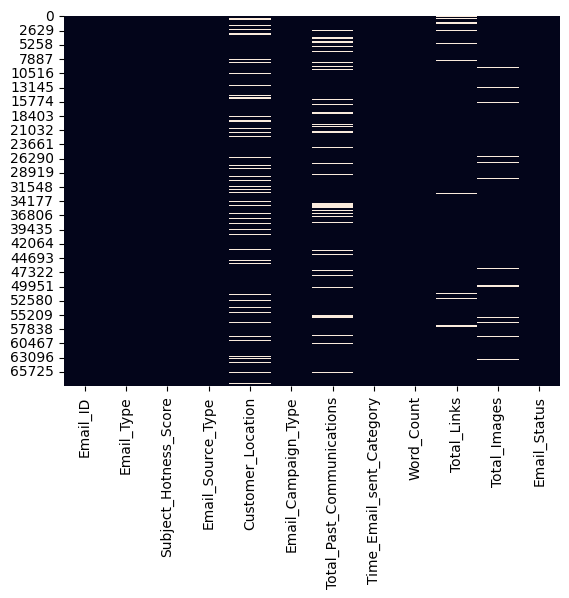

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
# Dataset Describe
df.describe()

Email_Type  Subject_Hotness_Score  Email_Source_Type  \
count  68353.000000           68353.000000       68353.000000   
mean       1.285094               1.095481           1.456513   
std        0.451462               0.997578           0.498109   
min        1.000000               0.000000           1.000000   
25%        1.000000               0.200000           1.000000   
50%        1.000000               0.800000           1.000000   
75%        2.000000               1.800000           2.000000   
max        2.000000               5.000000           2.000000   

       Email_Campaign_Type  Total_Past_Communications  \
count         68353.000000               61528.000000   
mean              2.272234                  28.933250   
std               0.468680                  12.536518   
min               1.000000                   0.000000   
25%               2.000000                  20.000000   
50%               2.000000                  28.000000   
75%               3.000000                  38.000000   
max               3.000000                  67.000000   

       Time_Email_sent_Category    Word_Count   Total_Links  Total_Images  \
count              68353.000000  68353.000000  66152.000000  66676.000000   
mean                   1.999298    699.931751     10.429526      3.550678   
std                    0.631103    271.719440      6.383270      5.596983   
min                    1.000000     40.000000      1.000000      0.000000   
25%                    2.000000    521.000000      6.000000      0.000000   
50%                    2.000000    694.000000      9.000000      0.000000   
75%                    2.000000    880.000000     14.000000      5.000000   
max                    3.000000   1316.000000     49.000000     45.000000   

       Email_Status  
count  68353.000000  
mean       0.230934  
std        0.497032  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        2.000000

### What did you know about your dataset?

The dataset contains 68,353 rows and 12 columns. All variables are in the correct data type, so no type casting is needed. No duplicate values were found in the dataset. Customer_Location and Total_Past_Communications contain significant null values, which need to be imputed using specialized techniques. Total_Links and Total_Images, however, can be imputed with standard techniques like mean or median imputation.  The statistical data of the dataframe indicate that the dataset does not contain outliers.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
for a_column in df.columns:
  print(a_column)

Email_ID
Email_Type
Subject_Hotness_Score
Email_Source_Type
Customer_Location
Email_Campaign_Type
Total_Past_Communications
Time_Email_sent_Category
Word_Count
Total_Links
Total_Images
Email_Status


### Variables Description

1. **Email ID** – Unique identifier for each recipient.

2. **Email Type** – Categorizes emails as marketing (1) or important updates (2).

3. **Subject Hotness Score** – A score measuring the effectiveness of the email subject line.

4. **Email Source Type** – Indicates whether the email is from sales/marketing or admin updates.

5. **Email Campaign Type** – The type/category of the email campaign.

4. **Total Past Communications** – The total number of emails sent to the recipient in the past.

5. **Customer Location** – Demographic location of the recipient.

6. **Time Email Sent Category** – Time of day when the email was sent (morning, evening, or night).

7. **Word Count** – Number of words in the email body.

8. **Total Links** – Count of hyperlinks included in the email.

9. **Total Images** – Number of images present in the email.

10. **Email Status** – Target variable indicating whether the email was ignored, read, or acknowledged.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print("Number of unique values and their percentage of the total for each column in the dataset:")
for column in df.columns:
  print(f"{column}: {len(df[column].unique())} ({round((len(df[column].unique()) / df.shape[0])* 100, 2)}%)")

Number of unique values and their percentage of the total for each column in the dataset:
Email_ID: 68353 (100.0%)
Email_Type: 2 (0.0%)
Subject_Hotness_Score: 51 (0.07%)
Email_Source_Type: 2 (0.0%)
Customer_Location: 8 (0.01%)
Email_Campaign_Type: 3 (0.0%)
Total_Past_Communications: 65 (0.1%)
Time_Email_sent_Category: 3 (0.0%)
Word_Count: 151 (0.22%)
Total_Links: 38 (0.06%)
Total_Images: 46 (0.07%)
Email_Status: 3 (0.0%)


### Categorical variables

In [ ]:
for col in df.columns:
    unique_count = len(df[col].unique())
    if unique_count < 10:
        print(f"Column: {col}, Unique Values: {df[col].unique()}")

Column: Email_Type, Unique Values: [1 2]
Column: Email_Source_Type, Unique Values: [2 1]
Column: Customer_Location, Unique Values: ['E' nan 'B' 'C' 'G' 'D' 'F' 'A']
Column: Email_Campaign_Type, Unique Values: [2 3 1]
Column: Time_Email_sent_Category, Unique Values: [1 2 3]
Column: Email_Status, Unique Values: [0 1 2]


In [ ]:
# Assuming your DataFrame is named 'df'
customer_location_counts = df['Customer_Location'].value_counts()
customer_location_counts

Customer_Location
G    23173
E    10193
D     7406
C     5758
F     4433
B     4341
A     1454
Name: count, dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

#### Total_Images Null Imputation

As there are small number of null values in Total_Images column we have imputed the null values with mode value.

In [ ]:
mode_Total_Images = df['Total_Images'].mode()[0]
df['Total_Images'].fillna(mode_Total_Images, inplace=True)

<ipython-input-14-cfd17daf84b2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total_Images'].fillna(mode_Total_Images, inplace=True)


#### Total_Links Null Imputation

As there are small number of null values in Total_Links column we have imputed the null values with mode value.

In [ ]:
mode_Total_Links = df['Total_Links'].mode()[0]
df['Total_Links'].fillna(mode_Total_Links, inplace=True)

<ipython-input-15-c898b394b60b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total_Links'].fillna(mode_Total_Links, inplace=True)


#### Total_Past_Communications Null Imputation using Regression

As there were 6825 null values in the column, regression would be the best method inorder impute the column.

In [ ]:
# Scale numerical features without modifying the original DataFrame
scaler = StandardScaler()
num_features = ['Subject_Hotness_Score', 'Word_Count', 'Total_Links']
scaled_features = scaler.fit_transform(df[num_features])

# Create a temporary DataFrame with scaled features for model training
df_scaled = df.copy()
df_scaled[num_features] = scaled_features

# Dynamically include one-hot encoded location columns
encoded_location_cols = [col for col in df.columns if col.startswith('Customer_Location_')]
features_for_regression = ['Subject_Hotness_Score', 'Word_Count', 'Total_Links', 'Email_Campaign_Type', 'Email_Status'] + encoded_location_cols

# Split data into rows with and without 'Total_Past_Communications'
train_data = df_scaled[df_scaled['Total_Past_Communications'].notnull()]
test_data = df_scaled[df_scaled['Total_Past_Communications'].isnull()]

if not test_data.empty:
    # Prepare features (X) and target (y)
    X = train_data[features_for_regression]
    y = train_data['Total_Past_Communications']
    X_test = test_data[features_for_regression]

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

    # Train the Random Forest Regressor with specified hyperparameters
    rf_model = RandomForestRegressor(
        max_depth=30,
        min_samples_leaf=6,
        min_samples_split=15,
        n_estimators=250,
        random_state=0
    )
    rf_model.fit(X_train, y_train)

    # Evaluate the model on validation data
    y_val_pred = rf_model.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred)
    mae = mean_absolute_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_val_pred)

    print(f"Validation Mean Squared Error: {mse:.2f}")
    print(f"Validation Mean Absolute Error: {mae:.2f}")
    print(f"Validation R2 Score: {r2:.2f}")

    # Predict missing values
    predicted_Total_Past_Communications = rf_model.predict(X_test)

    # Fill null values in the original DataFrame (not the scaled one)
    df.loc[df['Total_Past_Communications'].isnull(), 'Total_Past_Communications'] = predicted_Total_Past_Communications.astype(int)

    # Check if all missing values are filled
    print("\nNull values after imputation:")
    print(df['Total_Past_Communications'].isnull().sum())


Validation Mean Squared Error: 50.99
Validation Mean Absolute Error: 5.27
Validation R2 Score: 0.68

Null values after imputation:
0


#### Null Imputation of Customer_Location column with 'unknown'

As the customer_location column has large number of null data of about 11595 rows it would be wrong to remove the null rows as it can remove large number of important data and also it would be wrong to impute the null values with any other method. So, we are filling null values with the new category 'unknown'.

In [ ]:
# Assuming your DataFrame is named 'df'
df['Customer_Location'].fillna('unknown', inplace=True)

<ipython-input-17-d57dba550f5c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer_Location'].fillna('unknown', inplace=True)


In [ ]:
# Assuming your DataFrame is named 'df' (as in the provided code)
unique_total_images = df['Total_Past_Communications'].unique()
unique_total_images

array([33., 15., 36., 25., 18., 34., 21., 24., 40., 27., 42., 11., 23.,
       28., 37., 35., 51.,  9., 39., 17., 26., 31., 50., 30., 14., 45.,
       53.,  7., 38., 52., 22., 43., 12., 16., 20., 41., 56., 29.,  5.,
       32., 49., 44., 10., 46., 47., 48.,  8., 13.,  0.,  6., 55., 19.,
       60., 59., 61., 54., 62., 57., 64., 58., 65., 66., 67., 63.])

In [ ]:
# Assuming your DataFrame is named 'df' (as in the provided code)
total_images_counts = df['Total_Past_Communications'].value_counts()
total_images_counts

Total_Past_Communications
30.0    3222
20.0    3171
25.0    2661
40.0    2379
35.0    2053
        ... 
63.0      40
64.0      36
65.0      33
66.0      18
67.0       9
Name: count, Length: 64, dtype: int64

In [ ]:
total_images_counts = df['Customer_Location'].value_counts()
total_images_counts

Customer_Location
G          23173
unknown    11595
E          10193
D           7406
C           5758
F           4433
B           4341
A           1454
Name: count, dtype: int64

#### Final check for null values

In [ ]:
df.isnull().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

### What all manipulations have you done and insights you found?

For 'Total_Links' and 'Total_Images' as the number of null values are less, they were imputed with mode value. For column 'Total_Past_Communications' Random Forest Regresssor is used to fill the null values as the number of null values were significant enough to have an effect on the dataset. the null values in the column 'Customer_Location' is filled by value 'unknown' as the column is not influenced by most of the column which has made the prediction tough.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Correlation Heatmap

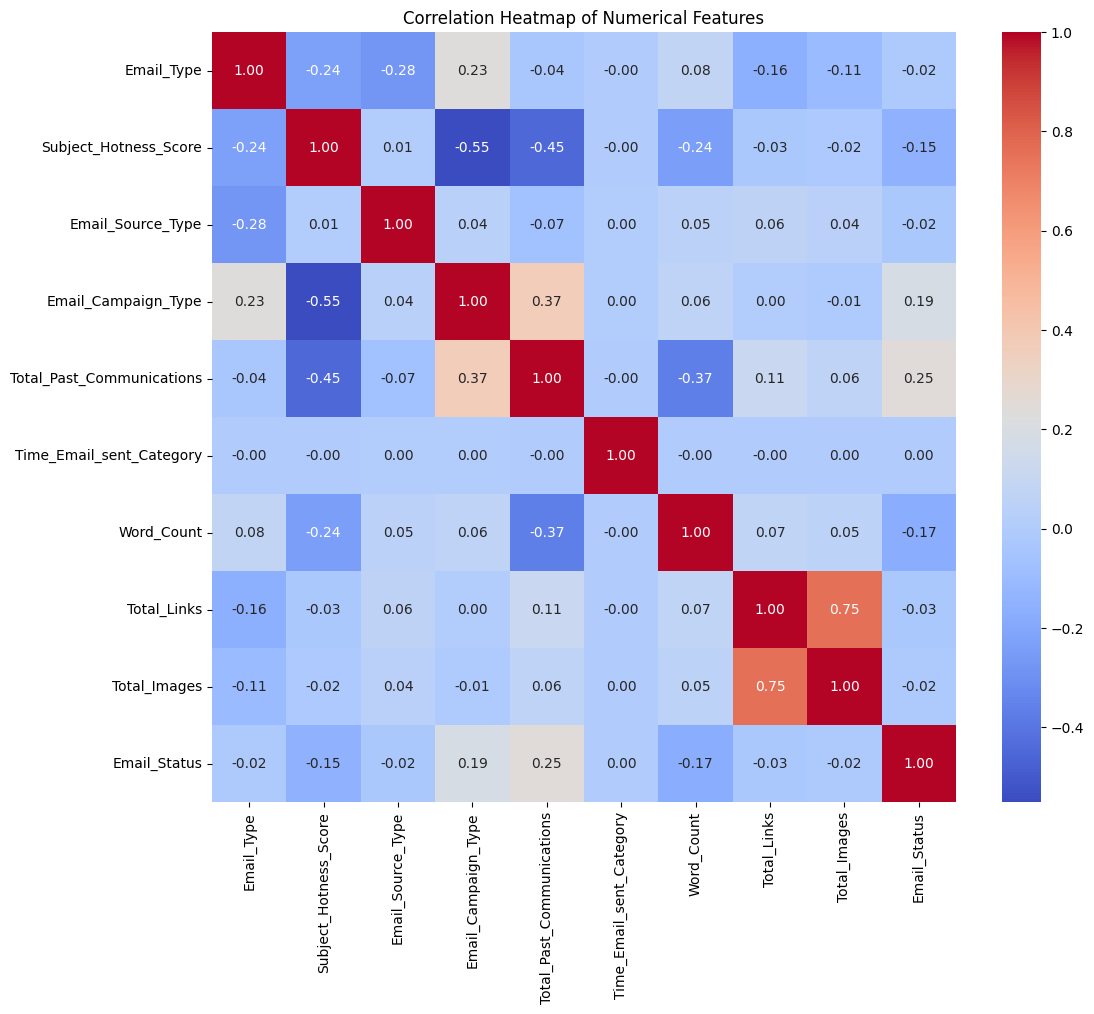

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df[['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type', 'Email_Campaign_Type', 'Total_Past_Communications', 'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images', 'Email_Status']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

In order to see the correlation Between the variables its important to see the correlation between variables.

##### 2. What is/are the insight(s) found from the chart?

Total Links Count is directly proportional to total image count. As most of the variables are categorical, the correlation is tough to be defined using correlation heatmap but slight correlations which can be used for our analysis can be deduced to be used in further analysis.

#### Chart - 2

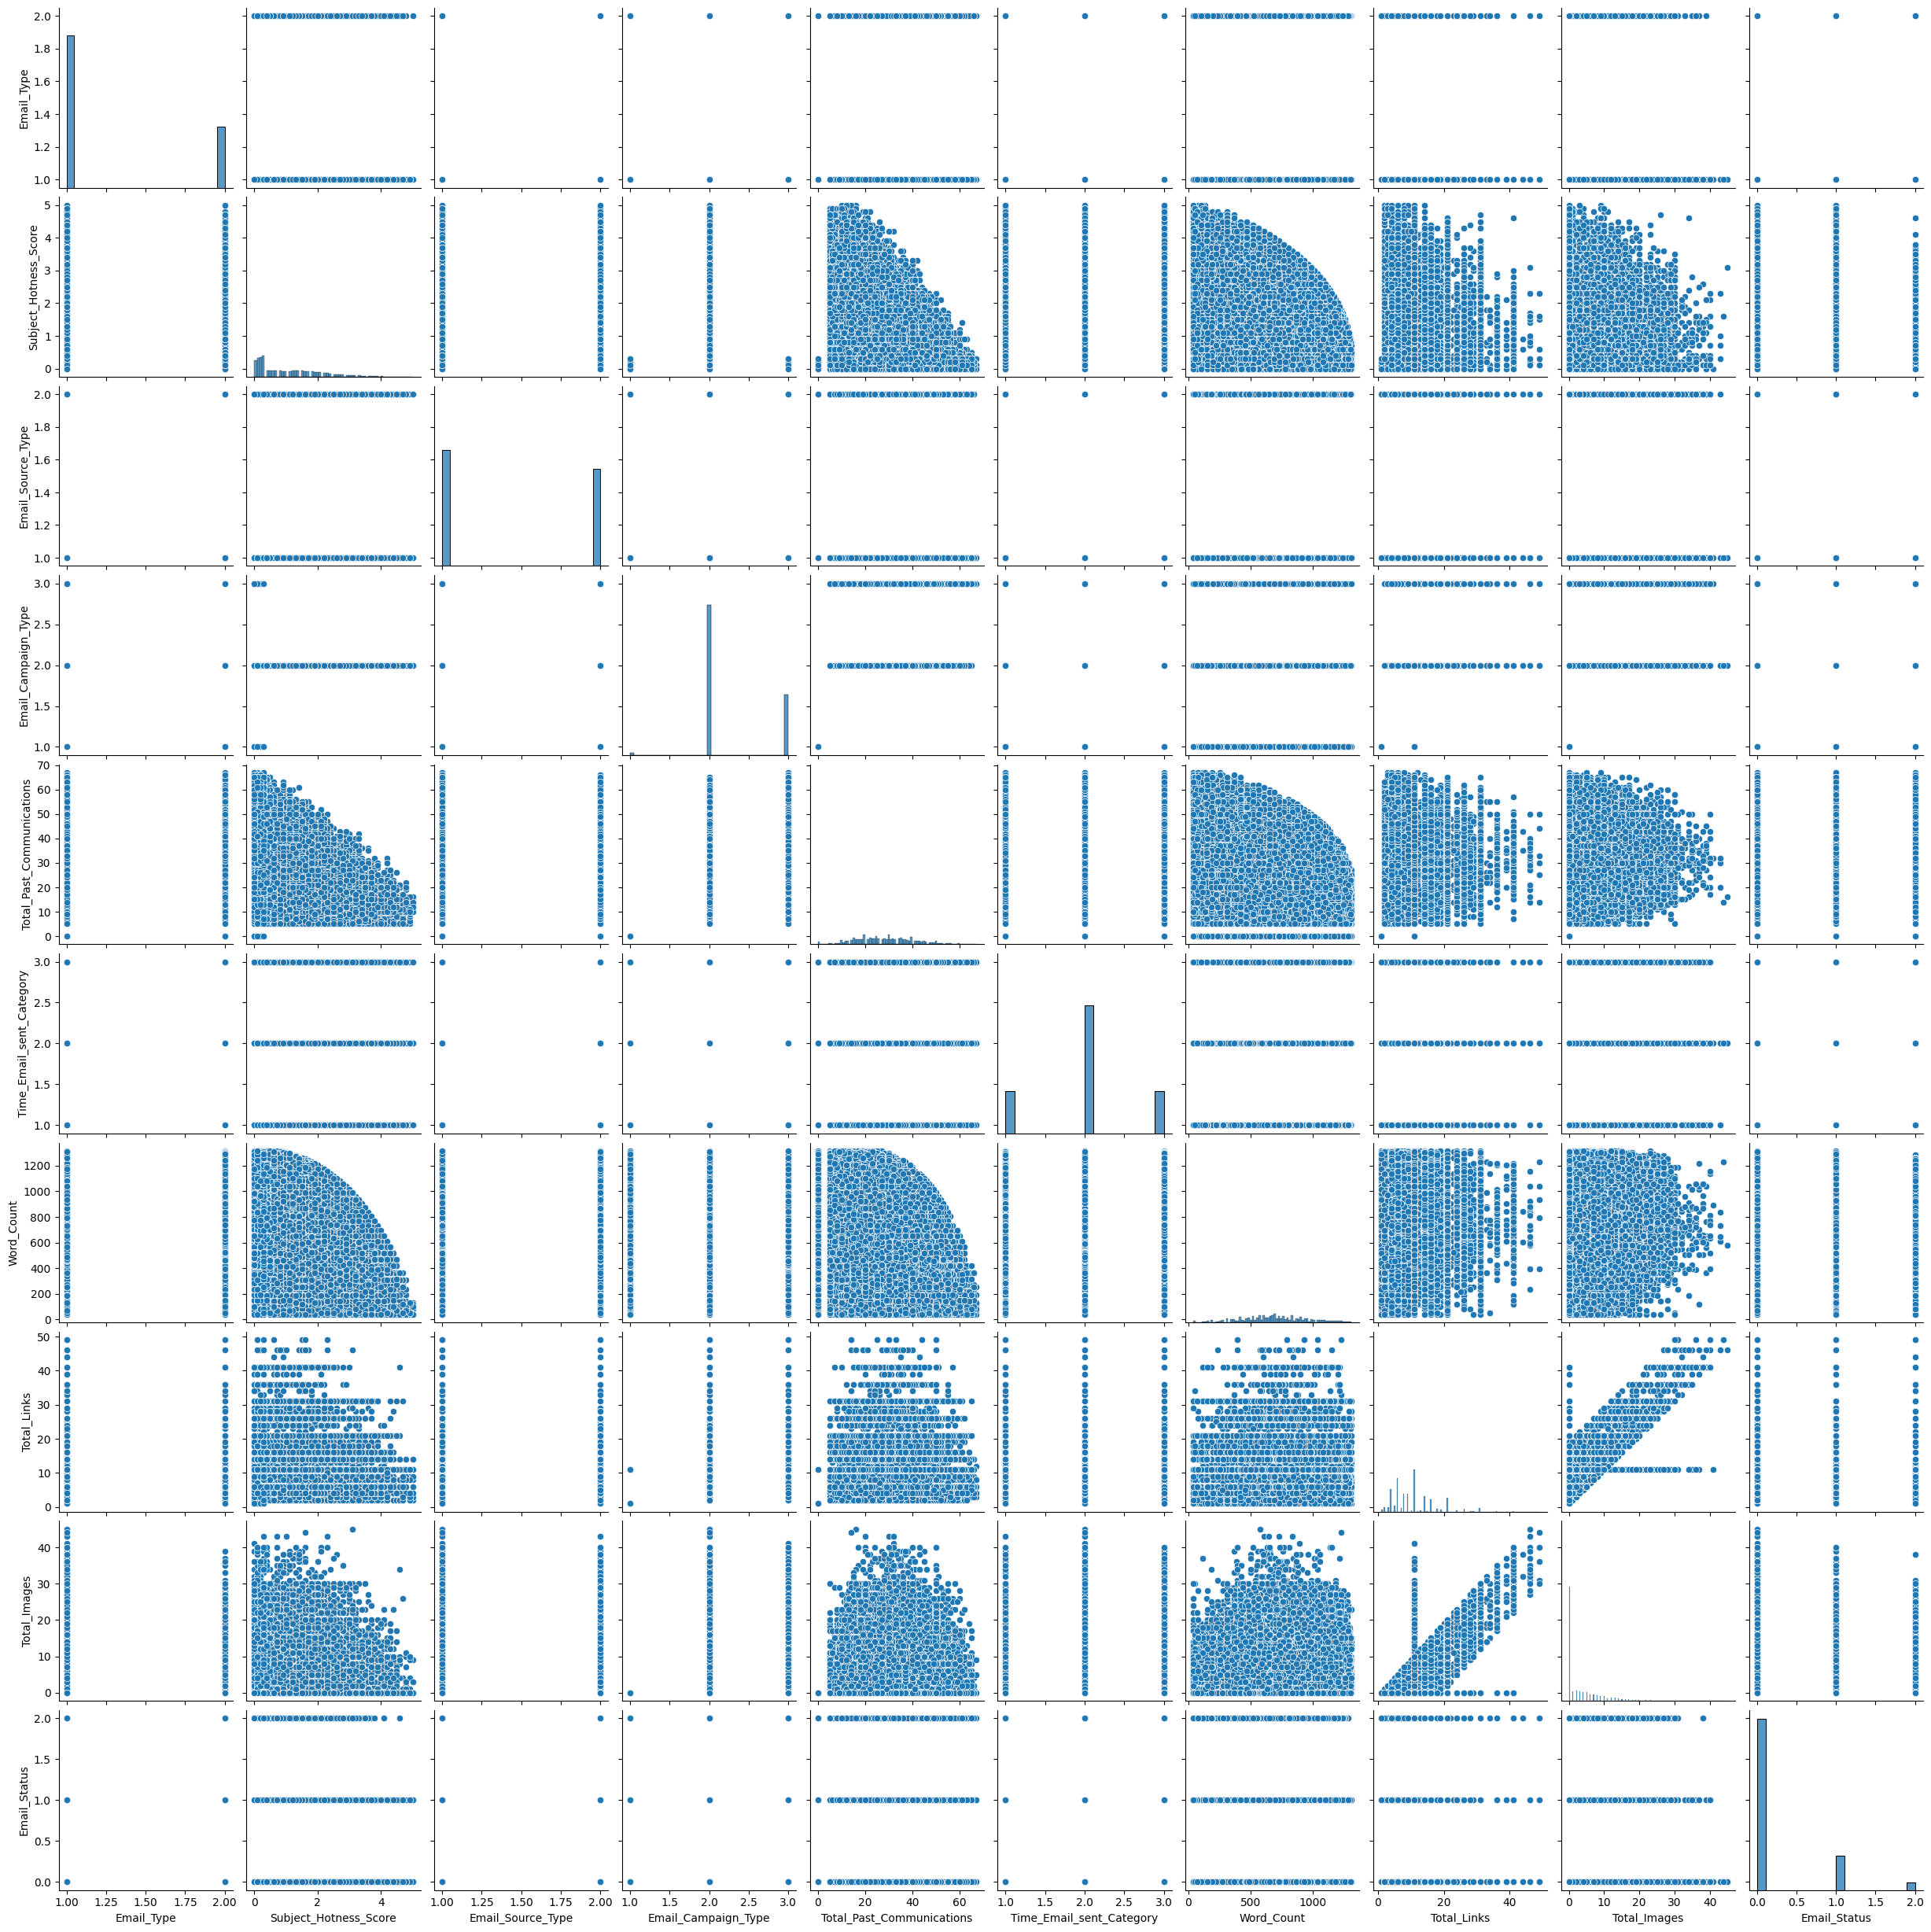

In [ ]:
sns.pairplot(df[['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type', 'Email_Campaign_Type', 'Total_Past_Communications', 'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images', 'Email_Status']])
plt.show()

##### 1. Why did you pick the specific chart?

The Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

##### 2. What is/are the insight(s) found from the chart?

Pairplot gives the relation between all the continues variables present in the dataset which can be used to visualize the effects in the future analysis.

#### Chart - 3 - Email Type Analysis

<ipython-input-24-cd03316ff753>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  email_status_counts = df_graph.groupby(['Email_Status', 'Email_Type']).size().unstack()


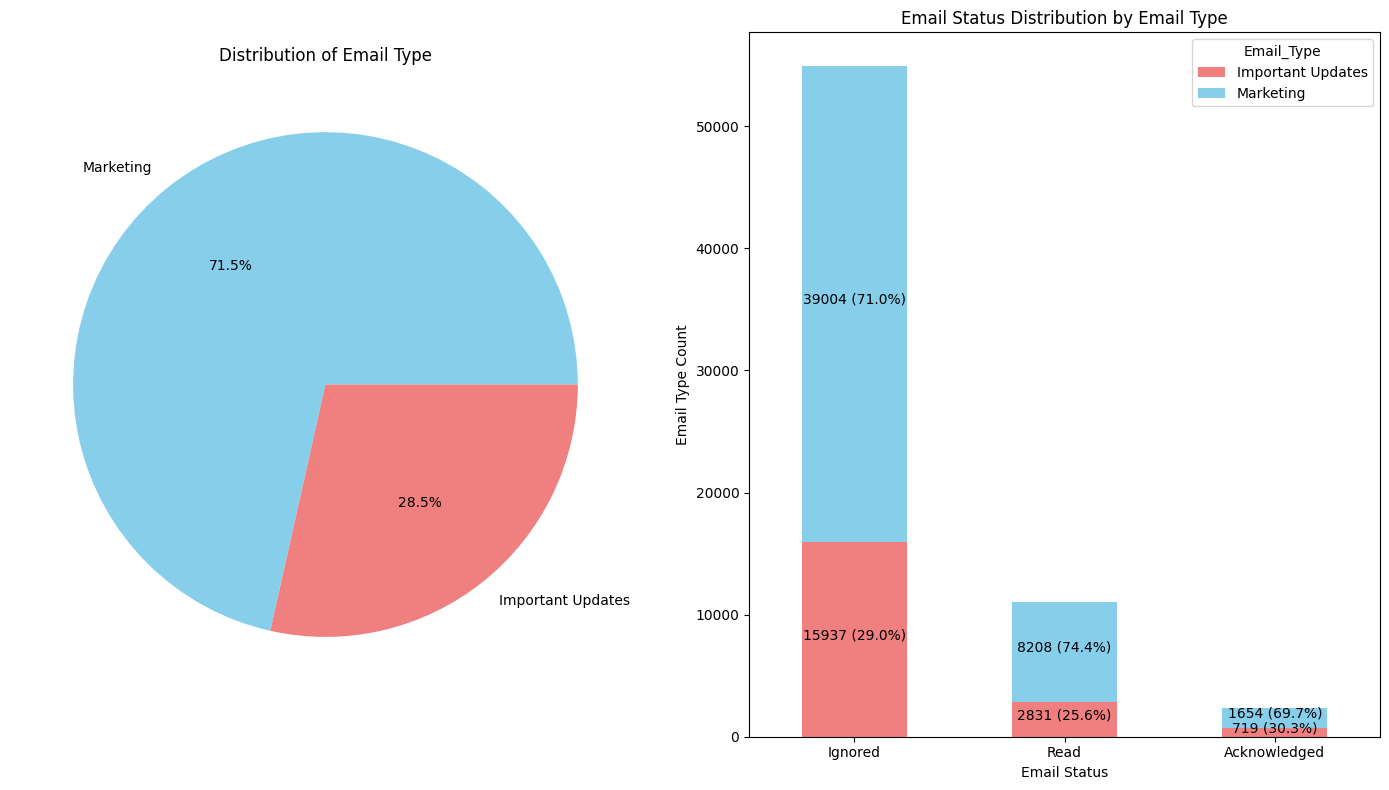

In [ ]:
# Chart - 3 visualization code

# Copy dataset
df_graph = df.copy()

# Replace 'Email_Type' values
df_graph['Email_Type'] = df_graph['Email_Type'].replace({1: 'Marketing', 2: 'Important Updates'})

# Replace 'Email_Status' values and enforce order
email_status_order = ['Ignored', 'Read', 'Acknowledged']
df_graph['Email_Status'] = df_graph['Email_Status'].replace({0: 'Ignored', 1: 'Read', 2: 'Acknowledged'})
df_graph['Email_Status'] = pd.Categorical(df_graph['Email_Status'], categories=email_status_order, ordered=True)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# ---------------- Pie Chart (Left Side) ----------------
email_type_counts = df_graph['Email_Type'].value_counts()
axes[0].pie(email_type_counts, labels=email_type_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axes[0].set_title('Distribution of Email Type')

# ---------------- Stacked Bar Chart (Right Side) ----------------
email_status_counts = df_graph.groupby(['Email_Status', 'Email_Type']).size().unstack()

# Compute percentage for each bar
email_status_percent = email_status_counts.div(email_status_counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart with actual count values
email_status_counts.plot(kind='bar', stacked=True, ax=axes[1], color=['lightcoral', 'skyblue'])
axes[1].set_xlabel('Email Status')
axes[1].set_xticklabels(email_status_counts.index, rotation=0)
axes[1].set_ylabel('Email Type Count')
axes[1].set_title('Email Status Distribution by Email Type')

# Add count and percentage labels on bars
for container, perc_container in zip(axes[1].containers, email_status_percent.values.T):
    labels = [f'{int(count)} ({perc:.1f}%)' if count > 0 else ''
              for count, perc in zip(container.datavalues, perc_container)]  # Format as "Count (Percentage)"

    axes[1].bar_label(container, labels=labels, label_type= 'center', fontsize=10, color='black', padding=3)

# Adjust layout for better spacing and avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

The Pie chart is used to get the preview of division of dataset among Marketing and Important updates Mails. The stacked columnar chart gives the three dimensional view of data distribution among additional categories Read and ignored mails.

##### 2. What is/are the insight(s) found from the chart?

Unequal distribution among marketing and important updates. Distribution in the read and ignored categories also nearly follow the same pattern with maore mails on the marketing side.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Important updates were also read less, which does not seem a good sign as we might be moving towards customer churn if it does not reach a targeted audience.

#### Chart - 4 - Subject Hotness Score Analysis

<ipython-input-25-7074c5fc2340>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_graph['Email_Status'], y=df_graph['Subject_Hotness_Score'], ax=axes[1], palette='coolwarm')


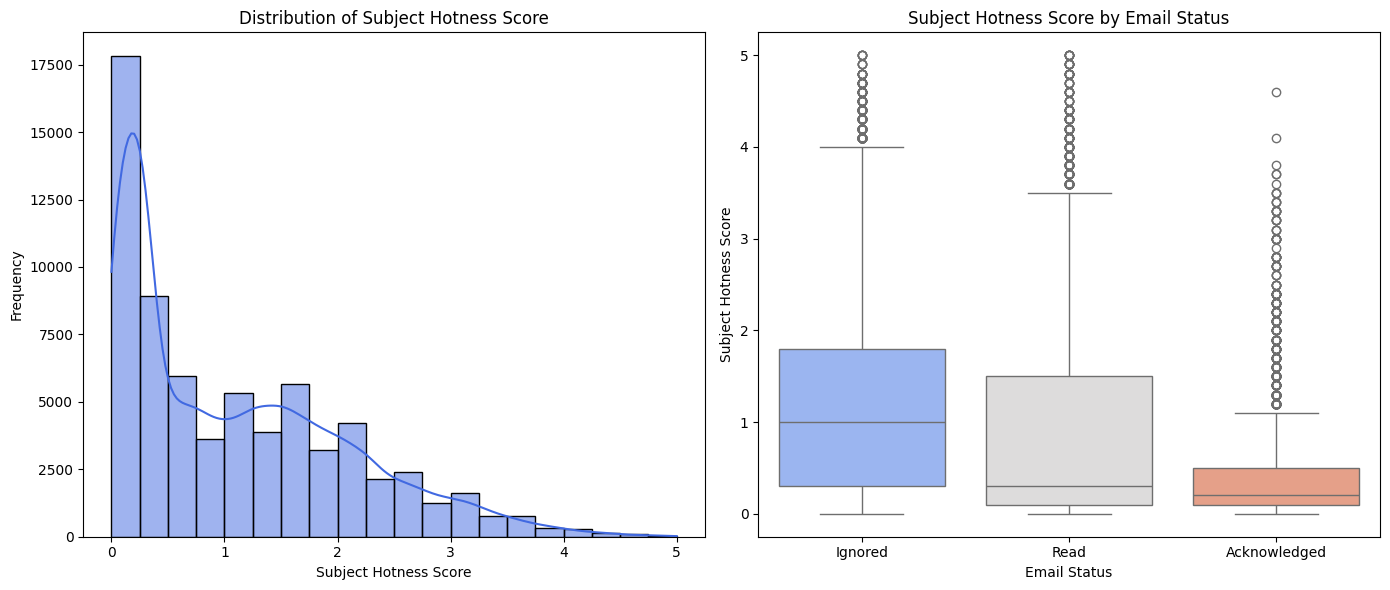

In [ ]:
# Chart - 4 visualization code

# Replace 'Email_Status' values and enforce order
email_status_order = ['Ignored', 'Read', 'Acknowledged']
df_graph['Email_Status'] = df_graph['Email_Status'].replace({0: 'Ignored', 1: 'Read', 2: 'Acknowledged'})
df_graph['Email_Status'] = pd.Categorical(df_graph['Email_Status'], categories=email_status_order, ordered=True)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---------------- Histogram of Subject_Hotness_Score (Left Side) ----------------
sns.histplot(df_graph['Subject_Hotness_Score'], bins=20, kde=True, ax=axes[0], color='royalblue')
axes[0].set_title('Distribution of Subject Hotness Score')
axes[0].set_xlabel('Subject Hotness Score')
axes[0].set_ylabel('Frequency')

# ---------------- Box Plot of Subject_Hotness_Score by Email_Status (Right Side) ----------------
sns.boxplot(x=df_graph['Email_Status'], y=df_graph['Subject_Hotness_Score'], ax=axes[1], palette='coolwarm')
axes[1].set_title('Subject Hotness Score by Email Status')
axes[1].set_xlabel('Email Status')
axes[1].set_ylabel('Subject Hotness Score')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

Histogram chart is the best way to represent the categorical values. Box plot is the best way to watch were most of the datapoints lie in the dataset.

##### 2. What is/are the insight(s) found from the chart?

From the above data it is clear that we are lagging far away in maintaining good subject hotness score for the email that we are sending. And the box plot which is pointing data towards the lower subject hotness score is because of most of the emails having lower subject hotness score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have to focus more on improving our subject hotness score as subject line is the most important factor that motivate the user to read the mail.

#### Chart - 5 - Email Source Type Analysis

<ipython-input-26-e98bbbd14292>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  email_status_counts = df_graph.groupby(['Email_Status', 'Email_Source_Type']).size().unstack()


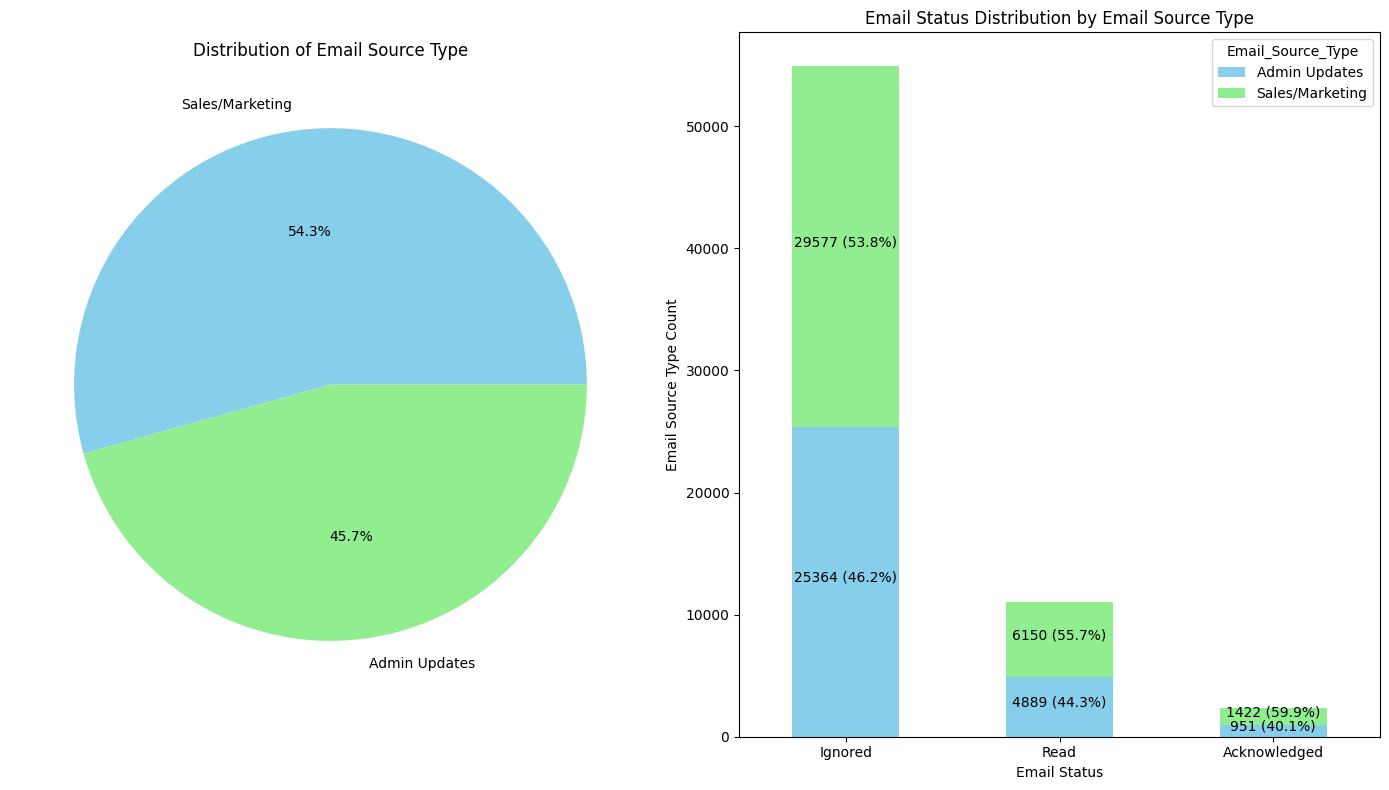

In [ ]:
# Chart - 5 visualization code

# Replace 'Email_Source_Type' values
df_graph['Email_Source_Type'] = df_graph['Email_Source_Type'].replace({1: 'Sales/Marketing', 2: 'Admin Updates'})

# Replace 'Email_Status' values and enforce order
email_status_order = ['Ignored', 'Read', 'Acknowledged']
df_graph['Email_Status'] = df_graph['Email_Status'].replace({0: 'Ignored', 1: 'Read', 2: 'Acknowledged'})
df_graph['Email_Status'] = pd.Categorical(df_graph['Email_Status'], categories=email_status_order, ordered=True)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# ---------------- Pie Chart (Left Side) ----------------
email_source_type_counts = df_graph['Email_Source_Type'].value_counts()
axes[0].pie(email_source_type_counts, labels=email_source_type_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
axes[0].set_title('Distribution of Email Source Type')

# ---------------- Stacked Bar Chart (Right Side) ----------------
email_status_counts = df_graph.groupby(['Email_Status', 'Email_Source_Type']).size().unstack()

# Compute percentage for each bar
email_status_percent = email_status_counts.div(email_status_counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart with actual count values
email_status_counts.plot(kind='bar', stacked=True, ax=axes[1], color=['skyblue', 'lightgreen'])
axes[1].set_xlabel('Email Status')
axes[1].set_xticklabels(email_status_counts.index, rotation=0)
axes[1].set_ylabel('Email Source Type Count')
axes[1].set_title('Email Status Distribution by Email Source Type')

# Add count and percentage labels on bars
for container, perc_container in zip(axes[1].containers, email_status_percent.values.T):
    labels = [f'{int(count)} ({perc:.1f}%)' if count > 0 else ''
              for count, perc in zip(container.datavalues, perc_container)]  # Format as "Count (Percentage)"

    axes[1].bar_label(container, labels=labels, label_type='center', fontsize=10, color='black', padding=3)

# Adjust layout for better spacing and avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

The Pie chart is used to get the preview of division of dataset among Marketing and Admin Update Mails. The stacked columnar chart gives the three dimensional view of data distribution among additional categories Read and ignored mails.

##### 2. What is/are the insight(s) found from the chart?

Marketing and Admin updates have nearly been equal divided. Acknowledgment for Admin update is slightly on the lower side.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We have to focus on improving admin mails and put emphasis on improving the percentage of marketing mails sent as it is very important for improving further bussiness improvement.

#### Chart - 6 - Customer Location Analysis

<ipython-input-27-b7fcf7acc371>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  email_status_counts = df_graph.groupby(['Customer_Location', 'Email_Status']).size().unstack(fill_value=0)


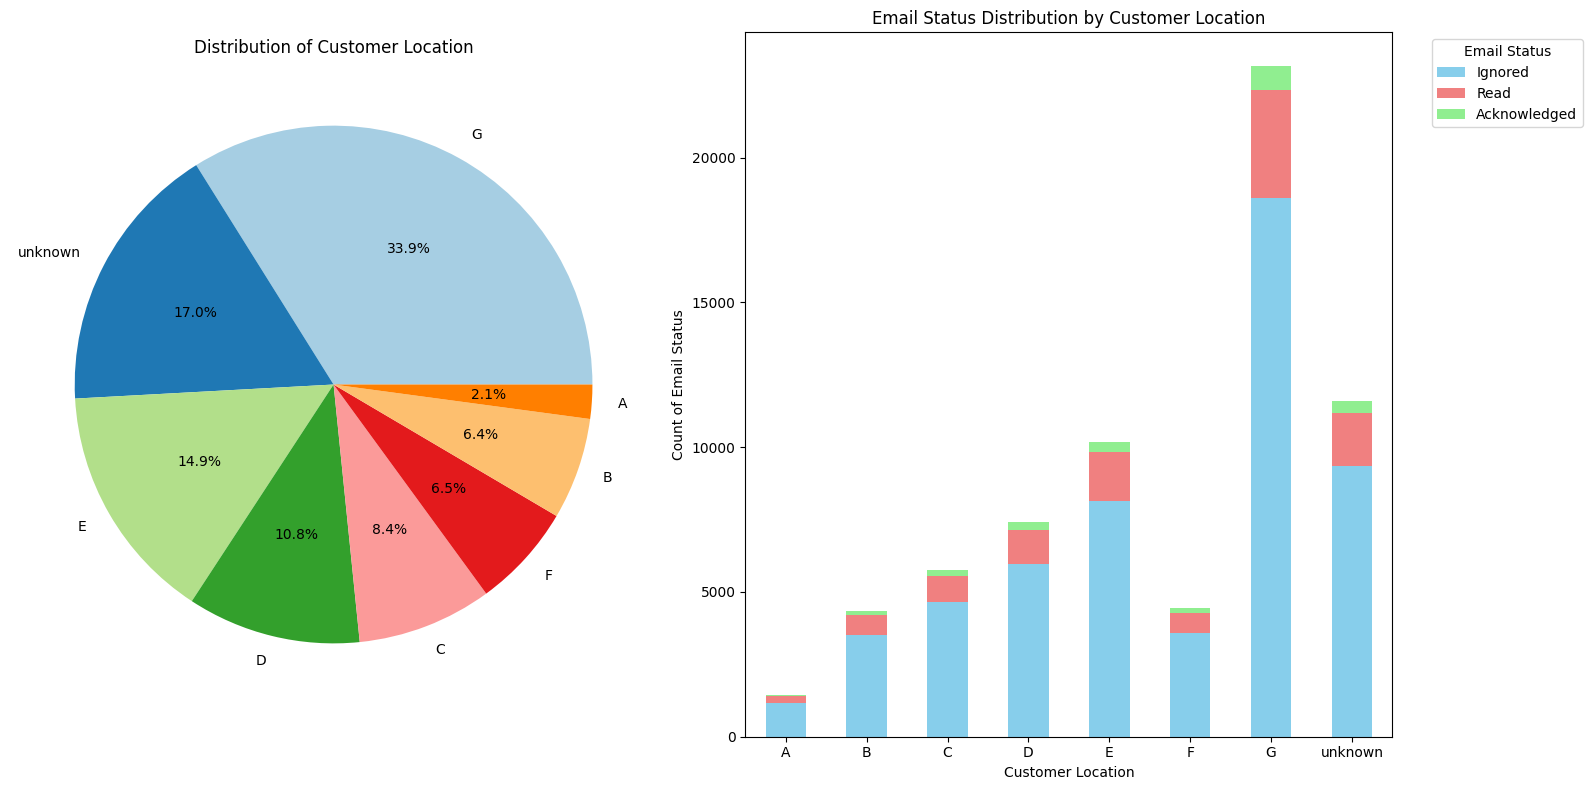

In [ ]:
# Chart - 6 visualization code

# Replace 'Email_Status' values and enforce order
email_status_order = ['Ignored', 'Read', 'Acknowledged']
df_graph['Email_Status'] = df_graph['Email_Status'].replace({0: 'Ignored', 1: 'Read', 2: 'Acknowledged'})
df_graph['Email_Status'] = pd.Categorical(df_graph['Email_Status'], categories=email_status_order, ordered=True)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# ---------------- Pie Chart (Left Side) ----------------
customer_location_counts = df_graph['Customer_Location'].value_counts()
# Ensure all categories are represented in the pie chart
axes[0].pie(customer_location_counts, labels=customer_location_counts.index, autopct='%1.1f%%',
            colors=plt.cm.Paired.colors[:len(customer_location_counts)])
axes[0].set_title('Distribution of Customer Location')

# ---------------- Stacked Bar Chart (Right Side) ----------------
email_status_counts = df_graph.groupby(['Customer_Location', 'Email_Status']).size().unstack(fill_value=0)

# Compute percentage for each bar
email_status_percent = email_status_counts.div(email_status_counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart with count values
email_status_counts.plot(kind='bar', stacked=True, ax=axes[1], color=['skyblue', 'lightcoral', 'lightgreen'])
axes[1].set_xlabel('Customer Location')
axes[1].set_xticklabels(email_status_counts.index, rotation=0)
axes[1].set_ylabel('Count of Email Status')
axes[1].set_title('Email Status Distribution by Customer Location')
axes[1].legend(title='Email Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better spacing and avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

The Pie chart give the best possible idea of distribution om mails arround different customer location. Stacked Bar Chart gives the picture of acceptance rate for our mail among the different customer location.

##### 2. What is/are the insight(s) found from the chart?

Customer location G has the lion share of mails and the location of second highest contender is unknown. Acceptance of email is relative to the quantity of emails sent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Further work need to be carried out in acquiring more customers in less explored regions. As we can see that more number of mails are leading to more number of conversions, its necessary to increse the quantity of emails sent. The important aspect is to strictly capture the customer location data in further sprints.

#### Chart - 7 - Email Campaign Analysis

<ipython-input-28-c98794d7939b>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  campaign_status_counts = df_graph.groupby(['Email_Status', 'Email_Campaign_Type']).size().unstack(fill_value=0)


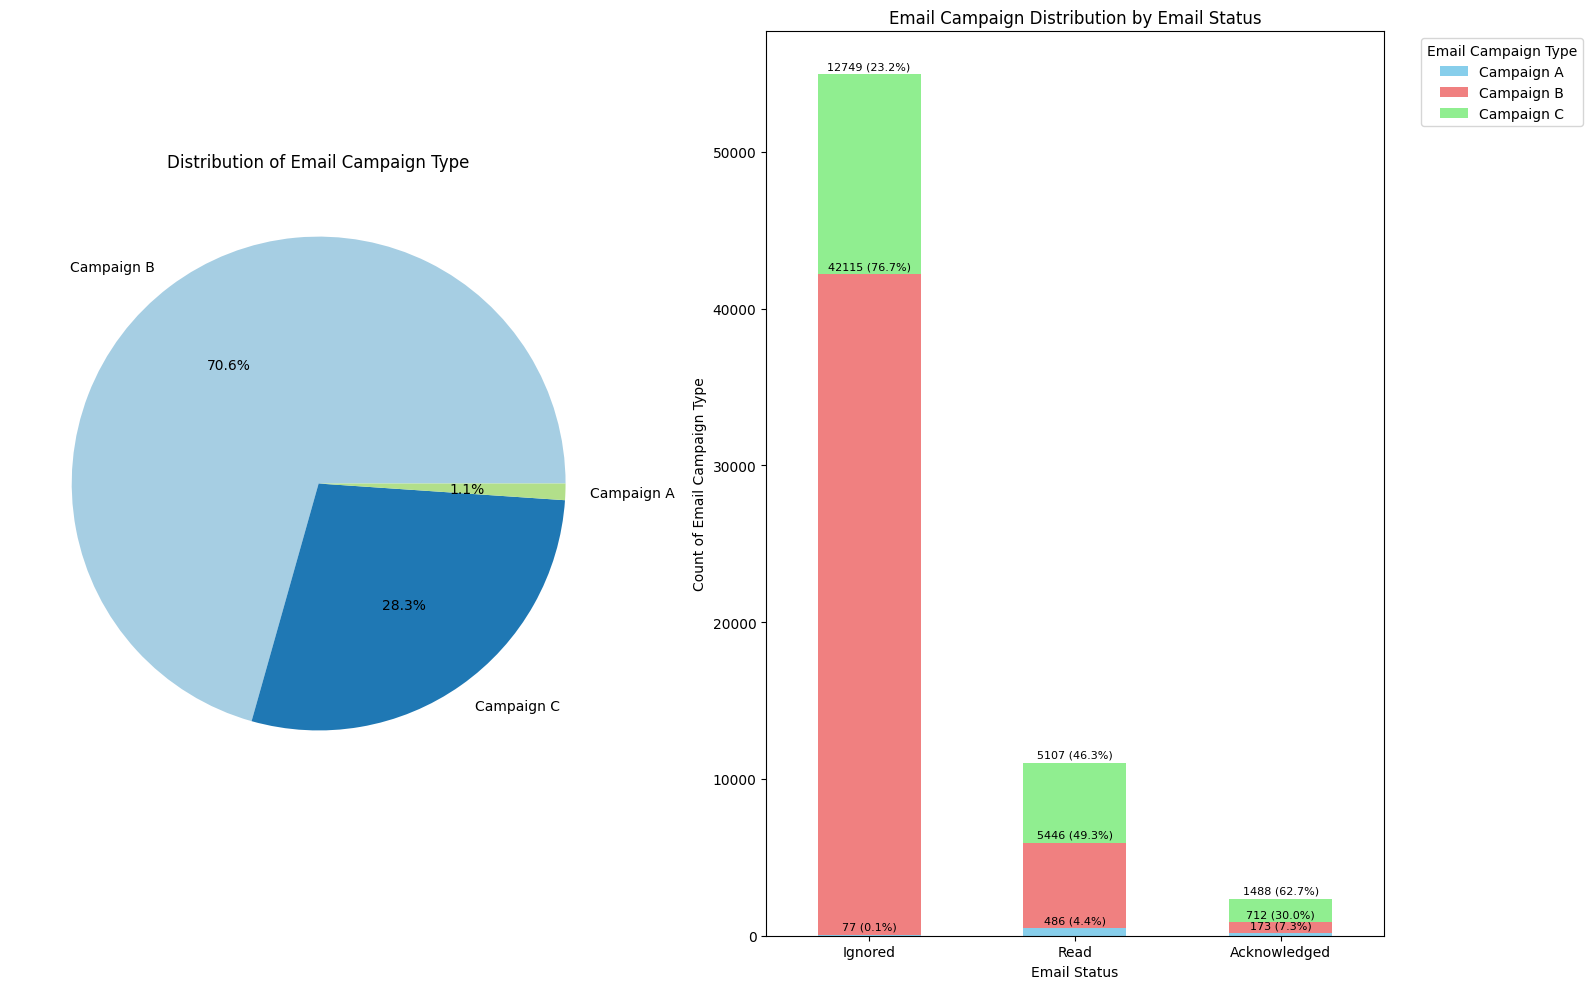

In [ ]:
# Chart - 7 visualization code

# Replace 'Email_Status' values and enforce order
email_status_order = ['Ignored', 'Read', 'Acknowledged']
df_graph['Email_Status'] = df_graph['Email_Status'].replace({0: 'Ignored', 1: 'Read', 2: 'Acknowledged'})
df_graph['Email_Status'] = pd.Categorical(df_graph['Email_Status'], categories=email_status_order, ordered=True)

# Replace 'Email_Campaign_Type' values (if needed, map them to readable categories)
df_graph['Email_Campaign_Type'] = df_graph['Email_Campaign_Type'].replace({1: 'Campaign A', 2: 'Campaign B', 3: 'Campaign C'})

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# ---------------- Pie Chart (Left Side) ----------------
campaign_type_counts = df_graph['Email_Campaign_Type'].value_counts()
# Ensure all categories are represented in the pie chart
axes[0].pie(campaign_type_counts, labels=campaign_type_counts.index, autopct='%1.1f%%',
            colors=plt.cm.Paired.colors[:len(campaign_type_counts)])
axes[0].set_title('Distribution of Email Campaign Type')

# ---------------- Stacked Bar Chart (Right Side) ----------------
campaign_status_counts = df_graph.groupby(['Email_Status', 'Email_Campaign_Type']).size().unstack(fill_value=0)

# Compute percentage for each bar
campaign_status_percent = campaign_status_counts.div(campaign_status_counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart with count values
campaign_status_counts.plot(kind='bar', stacked=True, ax=axes[1], color=['skyblue', 'lightcoral', 'lightgreen'])
axes[1].set_xlabel('Email Status')
axes[1].set_xticklabels(campaign_status_counts.index, rotation=0)
axes[1].set_ylabel('Count of Email Campaign Type')
axes[1].set_title('Email Campaign Distribution by Email Status')
axes[1].legend(title='Email Campaign Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add count and percentage labels on bars
for container, perc_container in zip(axes[1].containers, campaign_status_percent.values.T):
    labels = [f'{int(count)} ({perc:.1f}%)' if count > 0 else ''
              for count, perc in zip(container.datavalues, perc_container)]  # Format as "Count (Percentage)"

    axes[1].bar_label(container, labels=labels, label_type='edge', fontsize=8, color='black', padding=2)

# Adjust layout for better spacing and avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

Pie chart represent the distribution of emails among the campaigns. Stacked Bar Chart represent the success rate of each campaign.

##### 2. What is/are the insight(s) found from the chart?

The share of Campaign A is negligible in the distribution of email campaign type and Campaign B leads in its weightage. But surprisingly in Campaign A most of the emails have been read and acknowledged. Campaign C has also performed well with higher Return on investment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The factors that have influenced Campaign A and Campaign B in winning the game need to be studied and implemented in the further campaigns.

#### Chart - 8 - Customer Past Communication Analysis

<ipython-input-29-bf1d6e9b903c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


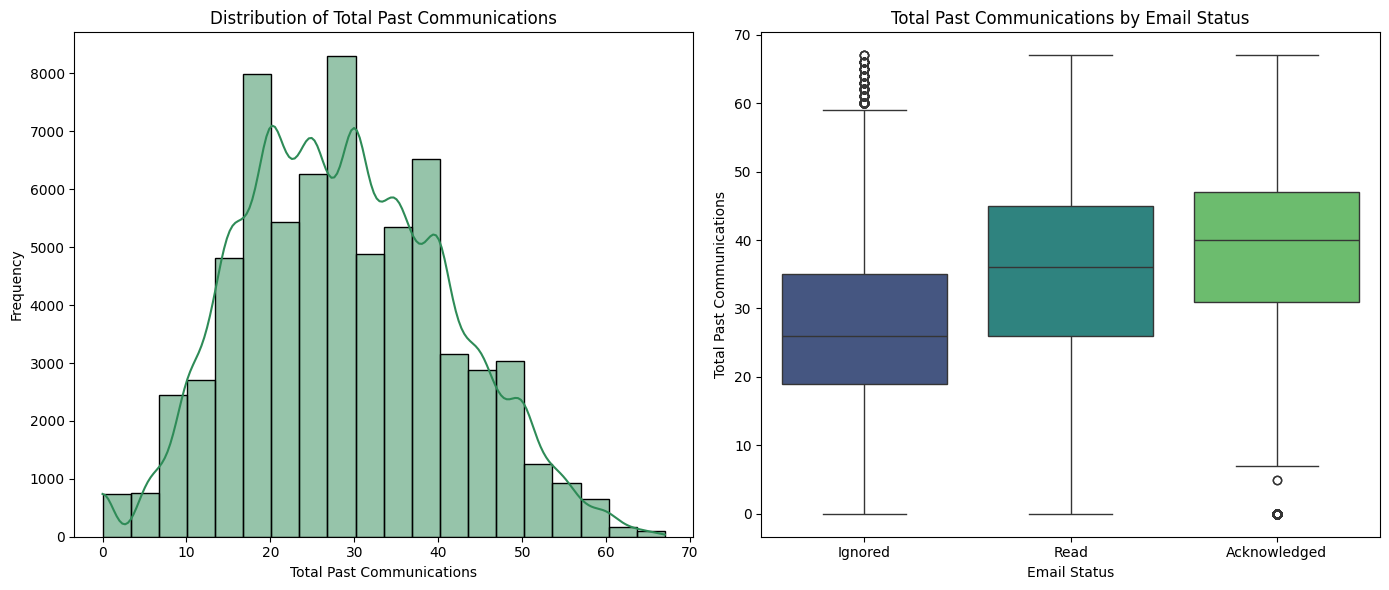

In [ ]:
# Chart - 8 visualization code

# Replace 'Email_Status' values and enforce order
email_status_order = ['Ignored', 'Read', 'Acknowledged']
df_graph['Email_Status'] = df_graph['Email_Status'].replace({0: 'Ignored', 1: 'Read', 2: 'Acknowledged'})
df_graph['Email_Status'] = pd.Categorical(df_graph['Email_Status'], categories=email_status_order, ordered=True)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---------------- Histogram of Total_Past_Communications (Left Side) ----------------
sns.histplot(
    df_graph['Total_Past_Communications'],
    bins=20,
    kde=True,
    ax=axes[0],
    color='seagreen'  # Updated color
)
axes[0].set_title('Distribution of Total Past Communications')
axes[0].set_xlabel('Total Past Communications')
axes[0].set_ylabel('Frequency')

# ---------------- Box Plot of Total_Past_Communications by Email_Status (Right Side) ----------------
sns.boxplot(
    x=df_graph['Email_Status'],
    y=df_graph['Total_Past_Communications'],
    ax=axes[1],
    palette='viridis'  # Updated color palette
)
axes[1].set_title('Total Past Communications by Email Status')
axes[1].set_xlabel('Email Status')
axes[1].set_ylabel('Total Past Communications')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

Histogram gives the clear picture of where the most number of Total Past Communications are concentrated. Box plot give the clear idea on how total past communications have affected the acceptance rate.

##### 2. What is/are the insight(s) found from the chart?

In histogram there is a spike in total past communication at values 20, 30 and 40. From Box plot we can see that acceptance is higher for people with more past communications.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The analysis helps in maintaining the total past communication at a moderate level so that the customer should not get overwehlmed and we should'nt have sent too less mails.

#### Chart - 9 - Time of Email Sent Analysis

<ipython-input-30-cdd3f03cc40d>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  email_status_counts = df_graph.groupby(['Email_Status', 'Time_Email_sent_Category']).size().unstack()


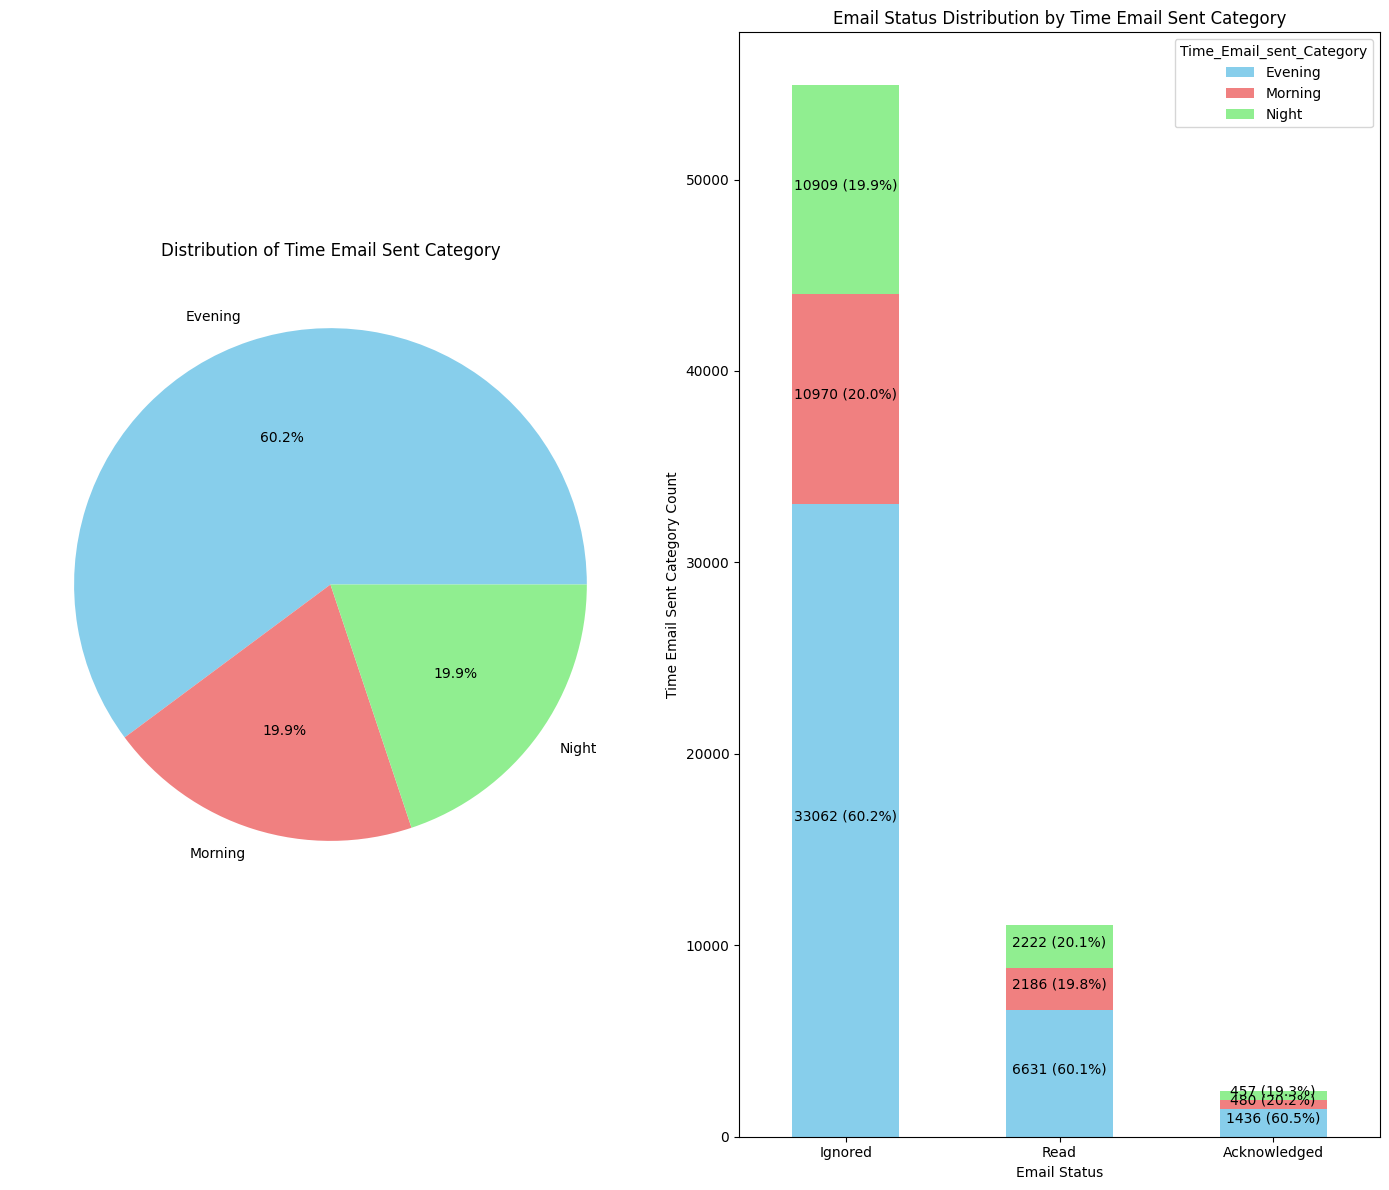

In [ ]:
# Chart - 9 visualization code

# Replace 'Time_Email_sent_Category' values
df_graph['Time_Email_sent_Category'] = df_graph['Time_Email_sent_Category'].replace({1: 'Morning', 2: 'Evening', 3: 'Night'})

# Replace 'Email_Status' values and enforce order
email_status_order = ['Ignored', 'Read', 'Acknowledged']
df_graph['Email_Status'] = df_graph['Email_Status'].replace({0: 'Ignored', 1: 'Read', 2: 'Acknowledged'})
df_graph['Email_Status'] = pd.Categorical(df_graph['Email_Status'], categories=email_status_order, ordered=True)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 12))

# ---------------- Pie Chart (Left Side) ----------------
time_category_counts = df_graph['Time_Email_sent_Category'].value_counts()
axes[0].pie(
    time_category_counts,
    labels=time_category_counts.index,
    autopct='%1.1f%%',
    colors=['skyblue', 'lightcoral', 'lightgreen']
)
axes[0].set_title('Distribution of Time Email Sent Category')

# ---------------- Stacked Bar Chart (Right Side) ----------------
email_status_counts = df_graph.groupby(['Email_Status', 'Time_Email_sent_Category']).size().unstack()

# Compute percentage for each bar
email_status_percent = email_status_counts.div(email_status_counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart with actual count values
email_status_counts.plot(kind='bar', stacked=True, ax=axes[1], color=['skyblue', 'lightcoral', 'lightgreen'])
axes[1].set_xlabel('Email Status')
axes[1].set_xticklabels(email_status_counts.index, rotation=0)
axes[1].set_ylabel('Time Email Sent Category Count')
axes[1].set_title('Email Status Distribution by Time Email Sent Category')

# Add count and percentage labels on bars
for container, perc_container in zip(axes[1].containers, email_status_percent.values.T):
    labels = [f'{int(count)} ({perc:.1f}%)' if count > 0 else ''
              for count, perc in zip(container.datavalues, perc_container)]  # Format as "Count (Percentage)"

    axes[1].bar_label(container, labels=labels, label_type='center', fontsize=10, color='black', padding=3)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

Pie chart gives the distribution of the time when email was sent. Stacked bar chart gives the distribution of the sent time among the mail acceptance.

##### 2. What is/are the insight(s) found from the chart?

Most of the mails were sent in the evening. Morning and night have got the similar distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We need to experiment with much more time frames inorder to optimize email sends based on send timing.

#### Chart - 10 - Word Count Analysis

<ipython-input-31-0ac84f554bea>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_graph['Email_Status'], y=df_graph['Word_Count'], ax=axes[1], palette='muted')


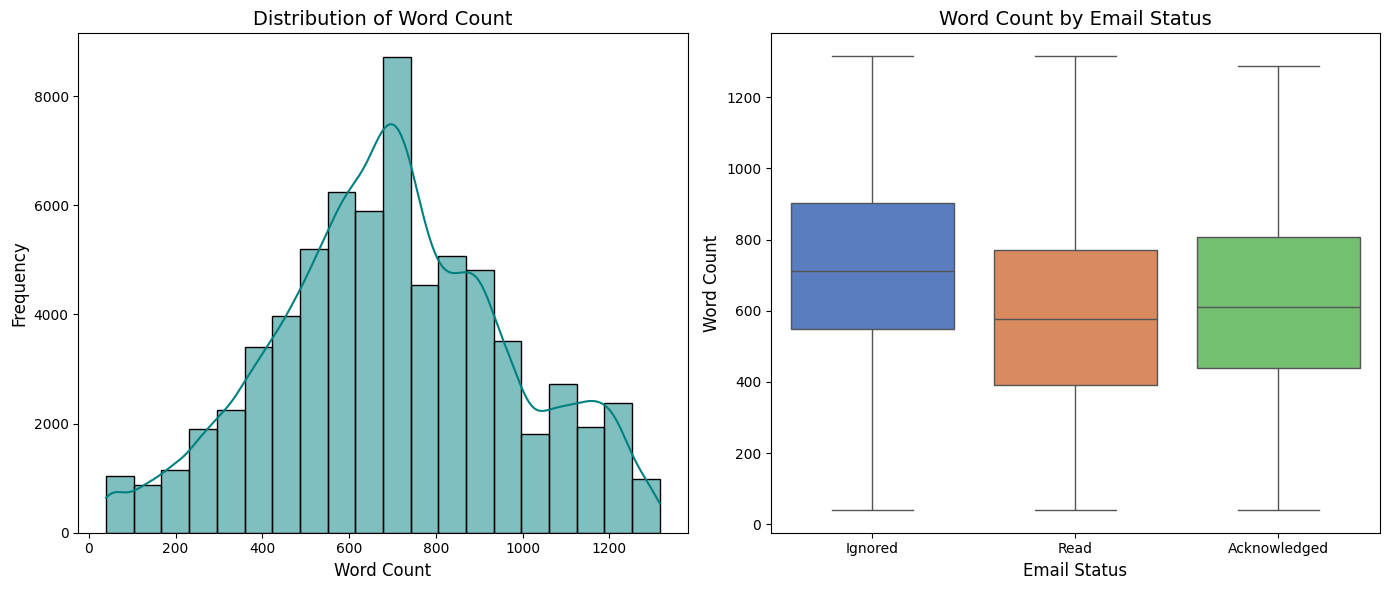

In [ ]:
# Chart - 10 visualization code

# Replace 'Email_Status' values and enforce order
email_status_order = ['Ignored', 'Read', 'Acknowledged']
df_graph['Email_Status'] = df_graph['Email_Status'].replace({0: 'Ignored', 1: 'Read', 2: 'Acknowledged'})
df_graph['Email_Status'] = pd.Categorical(df_graph['Email_Status'], categories=email_status_order, ordered=True)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---------------- Histogram of Word_Count (Left Side) ----------------
sns.histplot(df_graph['Word_Count'], bins=20, kde=True, ax=axes[0], color='teal')
axes[0].set_title('Distribution of Word Count', fontsize=14)
axes[0].set_xlabel('Word Count', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# ---------------- Box Plot of Word_Count by Email_Status (Right Side) ----------------
sns.boxplot(x=df_graph['Email_Status'], y=df_graph['Word_Count'], ax=axes[1], palette='muted')
axes[1].set_title('Word Count by Email Status', fontsize=14)
axes[1].set_xlabel('Email Status', fontsize=12)
axes[1].set_ylabel('Word Count', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

Histogram gives the clear representation of distribution of word count. Box plot gives the clear representation of distribution of acceptance rate among the word counts.

##### 2. What is/are the insight(s) found from the chart?

Although emails sent is on higher side where word count is 700. The ignored emails also lie at word count of 700 and acceptance is higher when word count comes down to 500 to 600.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For further emails word counts can be maintained between 500 to 600 for better acceptance.

#### Chart - 11 - Total Links in the Email Page Analysis

<ipython-input-32-a9f28f5b6618>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_graph['Email_Status'], y=df_graph['Total_Links'], ax=axes[1], palette='pastel')


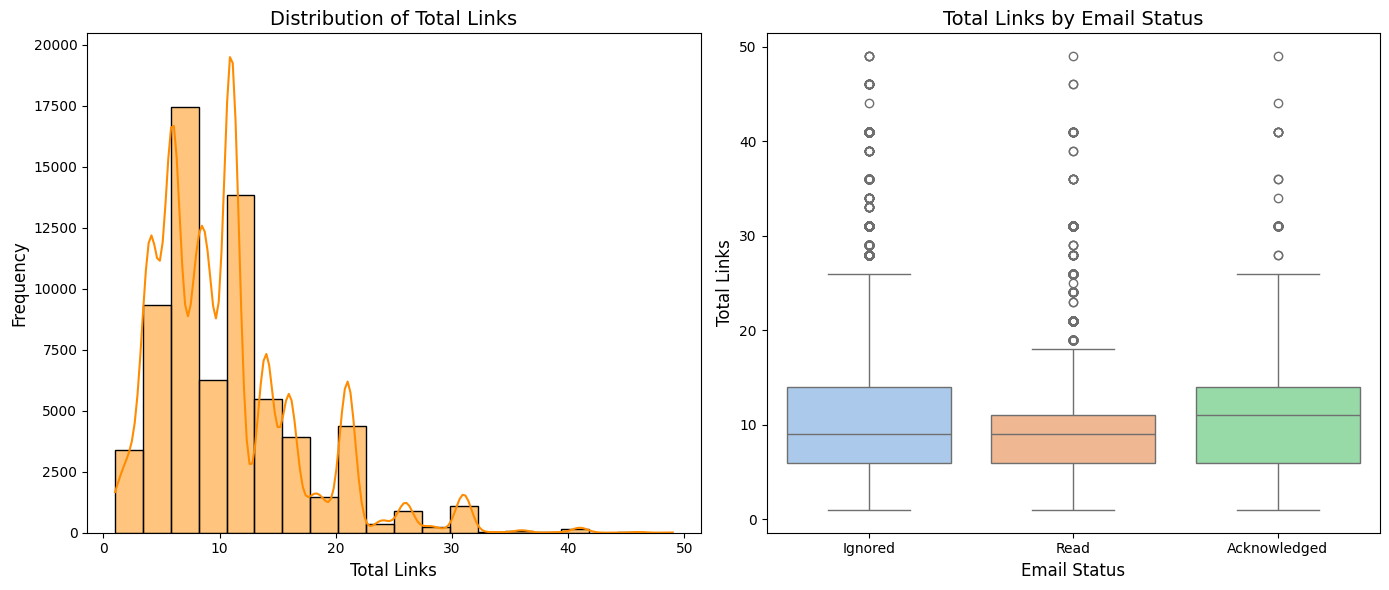

In [ ]:
# Chart - 11 visualization code

# Replace 'Email_Status' values and enforce order
email_status_order = ['Ignored', 'Read', 'Acknowledged']
df_graph['Email_Status'] = df_graph['Email_Status'].replace({0: 'Ignored', 1: 'Read', 2: 'Acknowledged'})
df_graph['Email_Status'] = pd.Categorical(df_graph['Email_Status'], categories=email_status_order, ordered=True)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---------------- Histogram of Total_Links (Left Side) ----------------
sns.histplot(df_graph['Total_Links'], bins=20, kde=True, ax=axes[0], color='darkorange')
axes[0].set_title('Distribution of Total Links', fontsize=14)
axes[0].set_xlabel('Total Links', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# ---------------- Box Plot of Total_Links by Email_Status (Right Side) ----------------
sns.boxplot(x=df_graph['Email_Status'], y=df_graph['Total_Links'], ax=axes[1], palette='pastel')
axes[1].set_title('Total Links by Email Status', fontsize=14)
axes[1].set_xlabel('Email Status', fontsize=12)
axes[1].set_ylabel('Total Links', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

Histogram gives us the distribution of link counts in emails. Box plot gives the idea on which mails were liked by our target customer and which were not.

##### 2. What is/are the insight(s) found from the chart?

As most of the mails had number of links between 5 and 15 the analysis is skewed towards it and no major insights are found.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Not much impact is possible as the data is highly concentrated arround 5 to 15.

#### Chart - 12 - Total images in the Email Analysis

<ipython-input-33-db3c19d9b97d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_graph['Email_Status'], y=df_graph['Total_Images'], ax=axes[1], palette='cool')


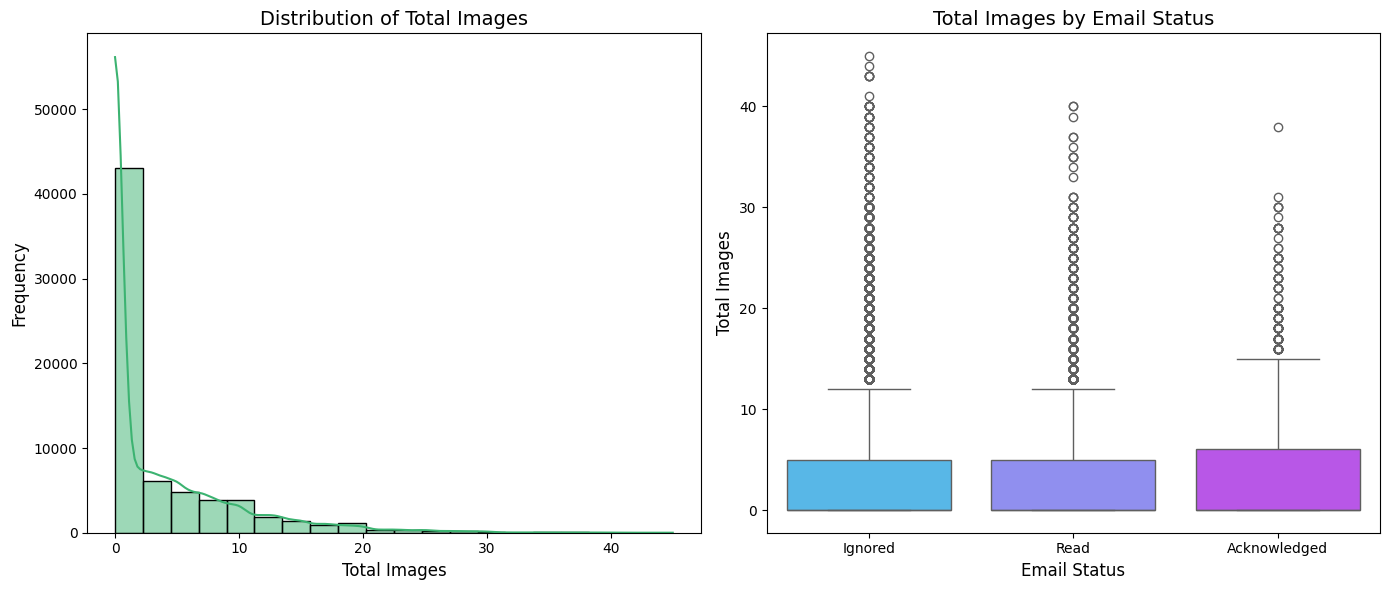

In [ ]:
# Chart - 12 visualization code

# Replace 'Email_Status' values and enforce order
email_status_order = ['Ignored', 'Read', 'Acknowledged']
df_graph['Email_Status'] = df_graph['Email_Status'].replace({0: 'Ignored', 1: 'Read', 2: 'Acknowledged'})
df_graph['Email_Status'] = pd.Categorical(df_graph['Email_Status'], categories=email_status_order, ordered=True)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---------------- Histogram of Total_Images (Left Side) ----------------
sns.histplot(df_graph['Total_Images'], bins=20, kde=True, ax=axes[0], color='mediumseagreen')
axes[0].set_title('Distribution of Total Images', fontsize=14)
axes[0].set_xlabel('Total Images', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# ---------------- Box Plot of Total_Images by Email_Status (Right Side) ----------------
sns.boxplot(x=df_graph['Email_Status'], y=df_graph['Total_Images'], ax=axes[1], palette='cool')
axes[1].set_title('Total Images by Email Status', fontsize=14)
axes[1].set_xlabel('Email Status', fontsize=12)
axes[1].set_ylabel('Total Images', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

Histogram gives us the distribution of image counts in emails. Box plot gives the idea on which mails were liked by our target customer and which were not.

##### 2. What is/are the insight(s) found from the chart?

As most of the mails had 1 or 2 images hence the analysis is skewed towards it and no major insights can be found.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Not much impact is possible as the data is highly concentrated arround 1 and 2.

#### Chart - 13 - Effect of Word Count on Subject Hotness Score and Total Past Communication

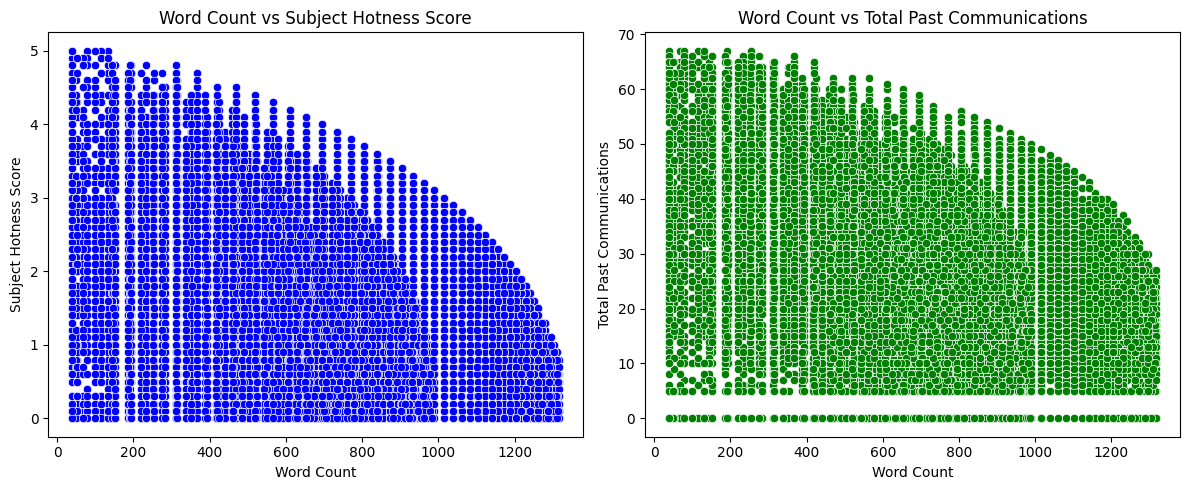

In [ ]:
# Chart - 13 visualization code

# Sample figure and axes creation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for 'Word_Count' vs 'Subject_Hotness_Score'
sns.scatterplot(x=df_graph['Word_Count'], y=df_graph['Subject_Hotness_Score'], ax=axes[0], color='b')
axes[0].set_title("Word Count vs Subject Hotness Score")
axes[0].set_xlabel("Word Count")
axes[0].set_ylabel("Subject Hotness Score")

# Scatter plot for 'Word_Count' vs 'Total_Past_Communications'
sns.scatterplot(x=df_graph['Word_Count'], y=df_graph['Total_Past_Communications'], ax=axes[1], color='g')
axes[1].set_title("Word Count vs Total Past Communications")
axes[1].set_xlabel("Word Count")
axes[1].set_ylabel("Total Past Communications")

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

As i was going through the pair plot the above scatter graph stuck my mind as it had some pattern.

##### 2. What is/are the insight(s) found from the chart?

Emails with higher word counts are prone to have lower subject hotness score. Whenever a person is sent a mail with higher word count he is communicated less number of time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is very much essential to enquire our this pattern in order to find the reason for the happenings. It may open a padarous box of insights which might be of good use for the further analysis.

#### Chart - 14 - Effect of Total Images on Total Links

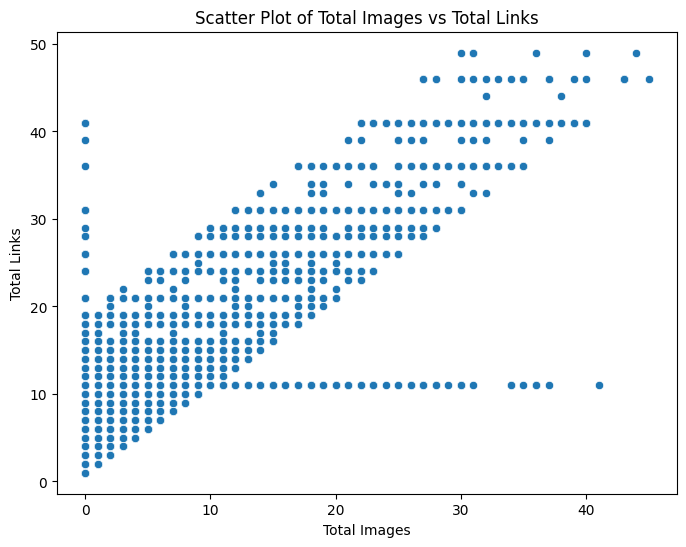

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_Images', y='Total_Links', data=df_graph)
plt.title('Scatter Plot of Total Images vs Total Links')
plt.xlabel('Total Images')
plt.ylabel('Total Links')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plot is best suited for understanding the relative dependence of number of images on number of links.

##### 2. What is/are the insight(s) found from the chart?

As the number of links in the mail increases the number of images have also increased relatively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Further study need to be conducted over this inorder to bring out consumable insights.

#### Chart - 15 - Effect of Word Count on Total Images and Total Links

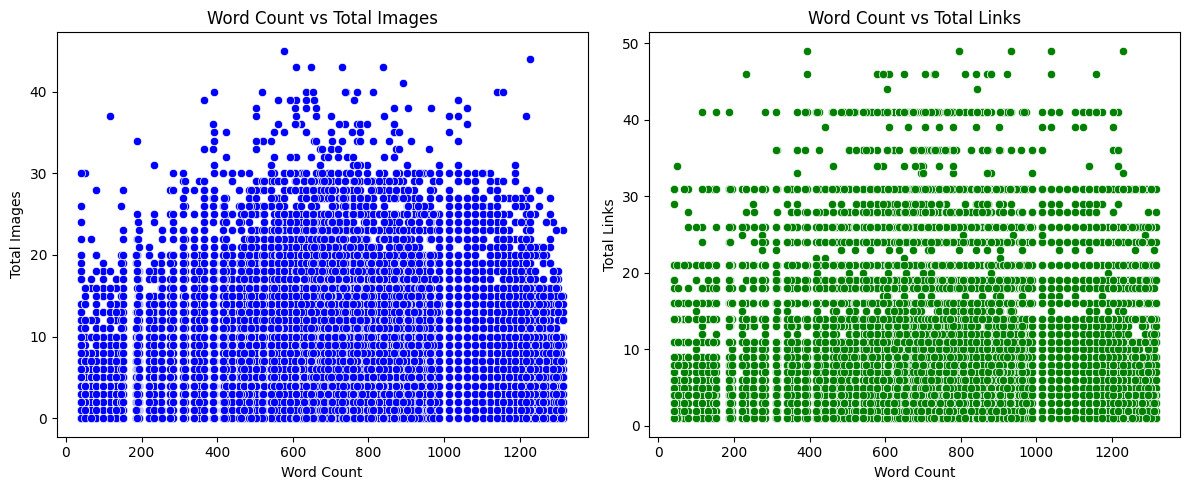

In [ ]:
# Sample figure and axes creation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for 'Word_Count' vs 'Total_Images'
sns.scatterplot(x=df_graph['Word_Count'], y=df_graph['Total_Images'], ax=axes[0], color='b')
axes[0].set_title("Word Count vs Total Images")
axes[0].set_xlabel("Word Count")
axes[0].set_ylabel("Total Images")

# Scatter plot for 'Word_Count' vs 'Total_Links'
sns.scatterplot(x=df_graph['Word_Count'], y=df_graph['Total_Links'], ax=axes[1], color='g')
axes[1].set_title("Word Count vs Total Links")
axes[1].set_xlabel("Word Count")
axes[1].set_ylabel("Total Links")

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plot bring out the relationship between the word count v/s total images and total links. Scatter plots are the best to plot relationship between two continuous variables.

##### 2. What is/are the insight(s) found from the chart?

The effect of word count have been bare minimum on the total images and total links.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If the mails with higher word count cotains lesser images it might bore the reader. If the mails with higher word count contains lesser number of links, it brings the doubt over information being relevant to the customer.

#### Chart - 15 - Effect of Email Type on Continuous Variables

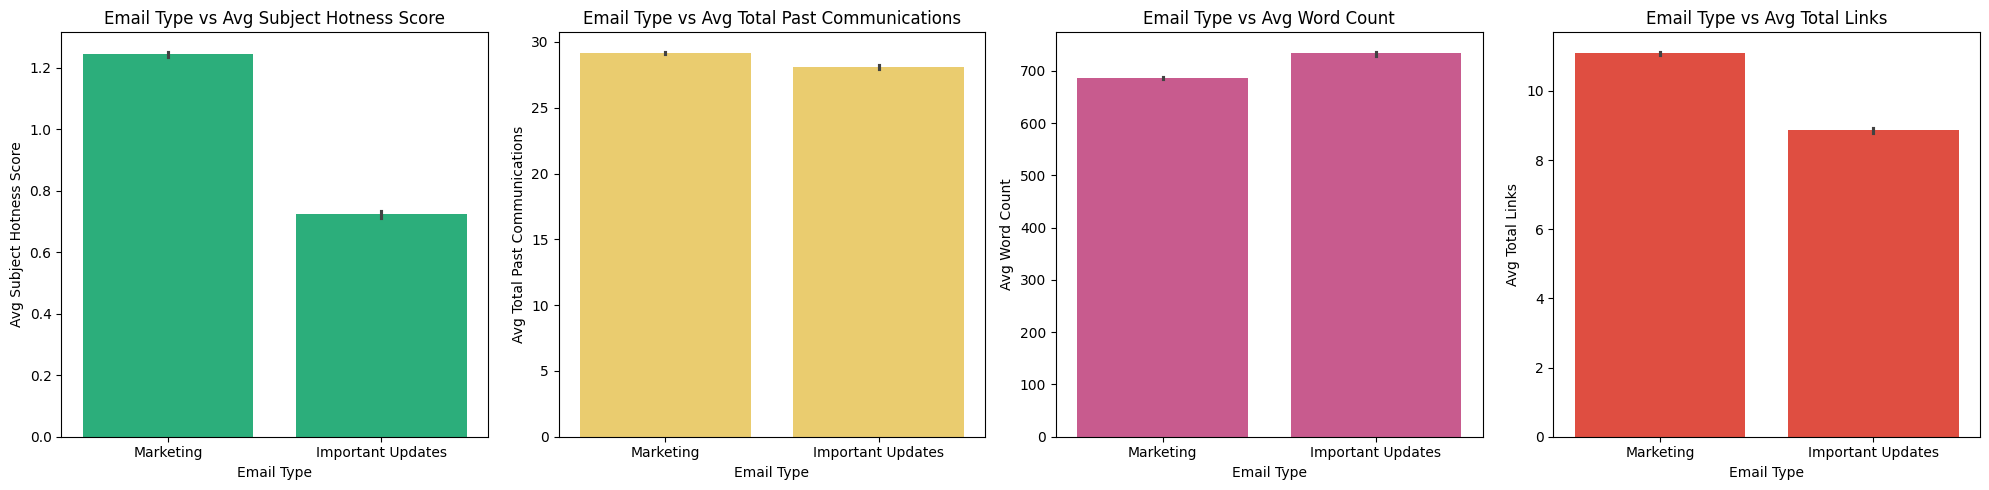

In [ ]:
# Sample figure and axes creation
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Bar plot for 'Time_Email_sent_Category' vs average of 'Subject_Hotness_Score'
sns.barplot(x=df_graph['Email_Type'], y=df_graph['Subject_Hotness_Score'], ax=axes[0], estimator=lambda x: sum(x)/len(x), color='#16C47F')
axes[0].set_title("Email Type vs Avg Subject Hotness Score")
axes[0].set_xlabel("Email Type")
axes[0].set_ylabel("Avg Subject Hotness Score")
axes[0].tick_params(axis='x', rotation=0)

# Bar plot for 'Time_Email_sent_Category' vs average of 'Total_Past_Communications'
sns.barplot(x=df_graph['Email_Type'], y=df_graph['Total_Past_Communications'], ax=axes[1], estimator=lambda x: sum(x)/len(x), color='#FFD65A')
axes[1].set_title("Email Type vs Avg Total Past Communications")
axes[1].set_xlabel("Email Type")
axes[1].set_ylabel("Avg Total Past Communications")
axes[1].tick_params(axis='x', rotation=0)

# Bar plot for 'Time_Email_sent_Category' vs average of 'Word_Count'
sns.barplot(x=df_graph['Email_Type'], y=df_graph['Word_Count'], ax=axes[2], estimator=lambda x: sum(x)/len(x), color='#DA498D')
axes[2].set_title("Email Type vs Avg Word Count")
axes[2].set_xlabel("Email Type")
axes[2].set_ylabel("Avg Word Count")
axes[2].tick_params(axis='x', rotation=0)

# Bar plot for 'Time_Email_sent_Category' vs average of 'Total_Links'
sns.barplot(x=df_graph['Email_Type'], y=df_graph['Total_Links'], ax=axes[3], estimator=lambda x: sum(x)/len(x), color='#F93827')
axes[3].set_title("Email Type vs Avg Total Links")
axes[3].set_xlabel("Email Type")
axes[3].set_ylabel("Avg Total Links")
axes[3].tick_params(axis='x', rotation=0)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Columnar chart are the best suited once to compare categories.

##### 2. What is/are the insight(s) found from the chart?

Average hotness score for Marketing is more than imprtant updates as expected. Number of Total past Communications for both marketing and important updates is closer to each other. Average word count for marketing is less than important updates. Average total links for marketing is much higher compared to imporatant updates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Number of communications for Marketing can be improved.Subject hotness score for important updates can be improved.

#### Chart - 15 - Effect of Email Source Type on Continuous Variables

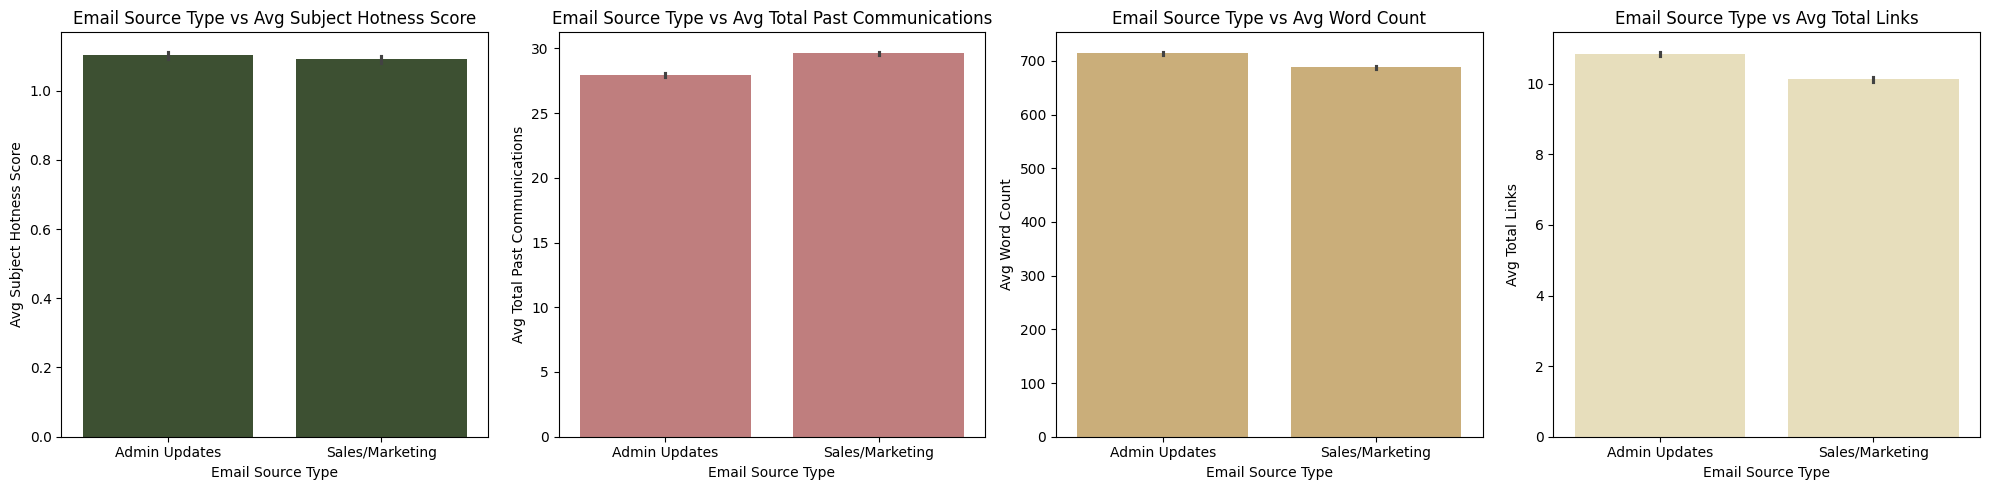

In [ ]:
# Sample figure and axes creation
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Bar plot for 'Email_Source_Type' vs average of 'Subject_Hotness_Score'
sns.barplot(x=df_graph['Email_Source_Type'], y=df_graph['Subject_Hotness_Score'], ax=axes[0], estimator=lambda x: sum(x)/len(x), color='#3C552D')
axes[0].set_title("Email Source Type vs Avg Subject Hotness Score")
axes[0].set_xlabel("Email Source Type")
axes[0].set_ylabel("Avg Subject Hotness Score")
axes[0].tick_params(axis='x', rotation=0)

# Bar plot for 'Email_Source_Type' vs 'Total_Past_Communications'
sns.barplot(x=df_graph['Email_Source_Type'], y=df_graph['Total_Past_Communications'], ax=axes[1], estimator=lambda x: sum(x)/len(x), color='#CA7373')
axes[1].set_title("Email Source Type vs Avg Total Past Communications")
axes[1].set_xlabel("Email Source Type")
axes[1].set_ylabel("Avg Total Past Communications")
axes[1].tick_params(axis='x', rotation=0)

# Bar plot for 'Email_Source_Type' vs 'Word_Count'
sns.barplot(x=df_graph['Email_Source_Type'], y=df_graph['Word_Count'], ax=axes[2], estimator=lambda x: sum(x)/len(x), color='#D7B26D')
axes[2].set_title("Email Source Type vs Avg Word Count")
axes[2].set_xlabel("Email Source Type")
axes[2].set_ylabel("Avg Word Count")
axes[2].tick_params(axis='x', rotation=0)

# Bar plot for 'Email_Source_Type' vs 'Total_Links'
sns.barplot(x=df_graph['Email_Source_Type'], y=df_graph['Total_Links'], ax=axes[3], estimator=lambda x: sum(x)/len(x), color='#EEE2B5')
axes[3].set_title("Email Source Type vs Avg Total Links")
axes[3].set_xlabel("Email Source Type")
axes[3].set_ylabel("Avg Total Links")
axes[3].tick_params(axis='x', rotation=0)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Columnar chart are the best suited once to compare categories.

##### 2. What is/are the insight(s) found from the chart?

Average subject hotness score of admin updates and sales/marketing is nearly equal. total past communications for sales/marketing is slightly higher than Admin updates. average word count and average total links are lower for sales/marketing compared to admin updates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Subject hotness score for marketing need to be much higher than admin updates, so we have to work on improving it.

#### Chart - 15 - Effect of Email Campaign Type on Continuous Variables

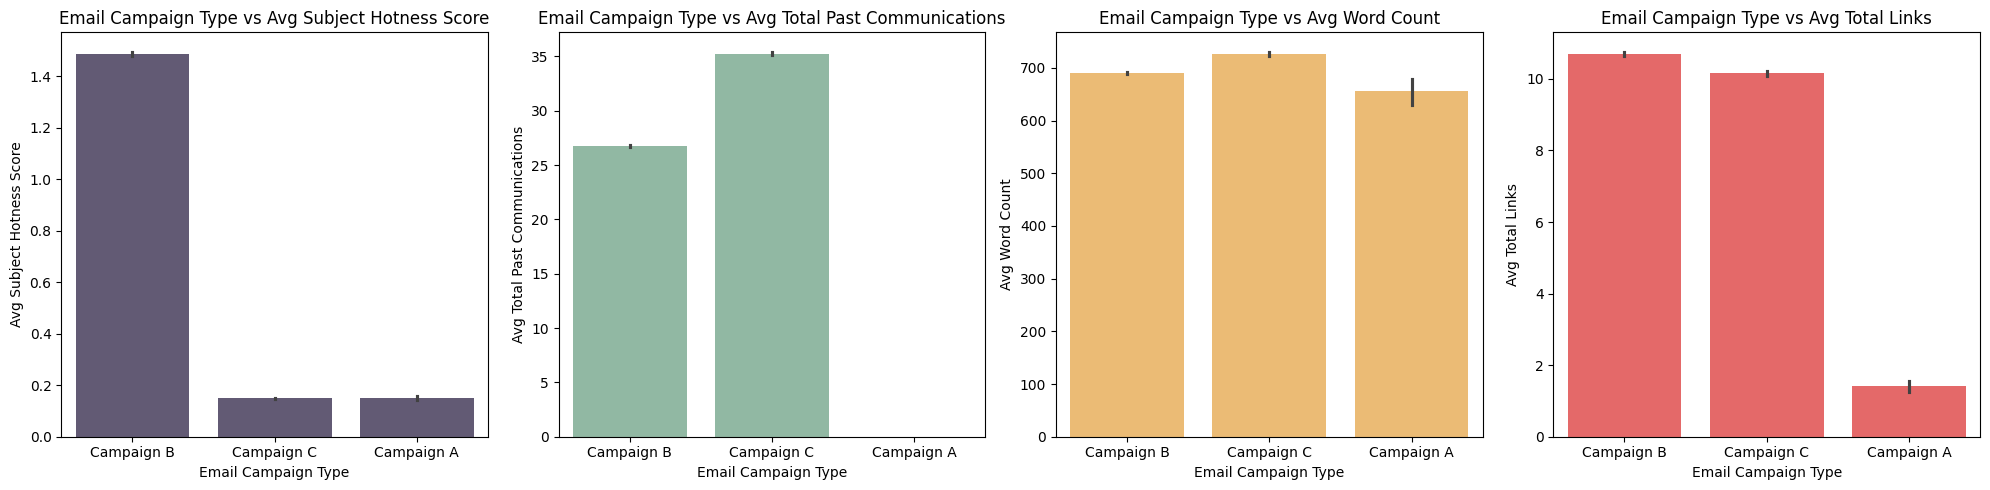

In [ ]:
# Sample figure and axes creation
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Bar plot for 'Email_Campaign_Type' vs average of 'Subject_Hotness_Score'
sns.barplot(x=df_graph['Email_Campaign_Type'], y=df_graph['Subject_Hotness_Score'], ax=axes[0], estimator=lambda x: sum(x)/len(x), color='#605678')
axes[0].set_title("Email Campaign Type vs Avg Subject Hotness Score")
axes[0].set_xlabel("Email Campaign Type")
axes[0].set_ylabel("Avg Subject Hotness Score")
axes[0].tick_params(axis='x', rotation=0)

# Bar plot for 'Email_Campaign_Type' vs 'Total_Past_Communications'
sns.barplot(x=df_graph['Email_Campaign_Type'], y=df_graph['Total_Past_Communications'], ax=axes[1], estimator=lambda x: sum(x)/len(x), color='#8ABFA3')
axes[1].set_title("Email Campaign Type vs Avg Total Past Communications")
axes[1].set_xlabel("Email Campaign Type")
axes[1].set_ylabel("Avg Total Past Communications")
axes[1].tick_params(axis='x', rotation=0)

# Bar plot for 'Email_Campaign_Type' vs 'Word_Count'
sns.barplot(x=df_graph['Email_Campaign_Type'], y=df_graph['Word_Count'], ax=axes[2], estimator=lambda x: sum(x)/len(x), color='#FFBF61')
axes[2].set_title("Email Campaign Type vs Avg Word Count")
axes[2].set_xlabel("Email Campaign Type")
axes[2].set_ylabel("Avg Word Count")
axes[2].tick_params(axis='x', rotation=0)

# Bar plot for 'Email_Campaign_Type' vs 'Total_Links'
sns.barplot(x=df_graph['Email_Campaign_Type'], y=df_graph['Total_Links'], ax=axes[3], estimator=lambda x: sum(x)/len(x), color='#F95454')
axes[3].set_title("Email Campaign Type vs Avg Total Links")
axes[3].set_xlabel("Email Campaign Type")
axes[3].set_ylabel("Avg Total Links")
axes[3].tick_params(axis='x', rotation=0)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Columnar chart are the best suited once to compare categories.

##### 2. What is/are the insight(s) found from the chart?

Subject hotness score for campaign A and C is much on lower side compared to campaign B. Total past communications for campaighn A is neggligible compared to other two campaigns. Average word count for each of the campaigns have been similar. Average total links count for campaign A is much lower than other two.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As campaign A was the best performer in acceptance rate, there might be some difference in campaign characteristics or the purpose of campaign which might be causing this issue.

#### Chart - 15 - Effect of Time of Email Sent on Continuous Variables

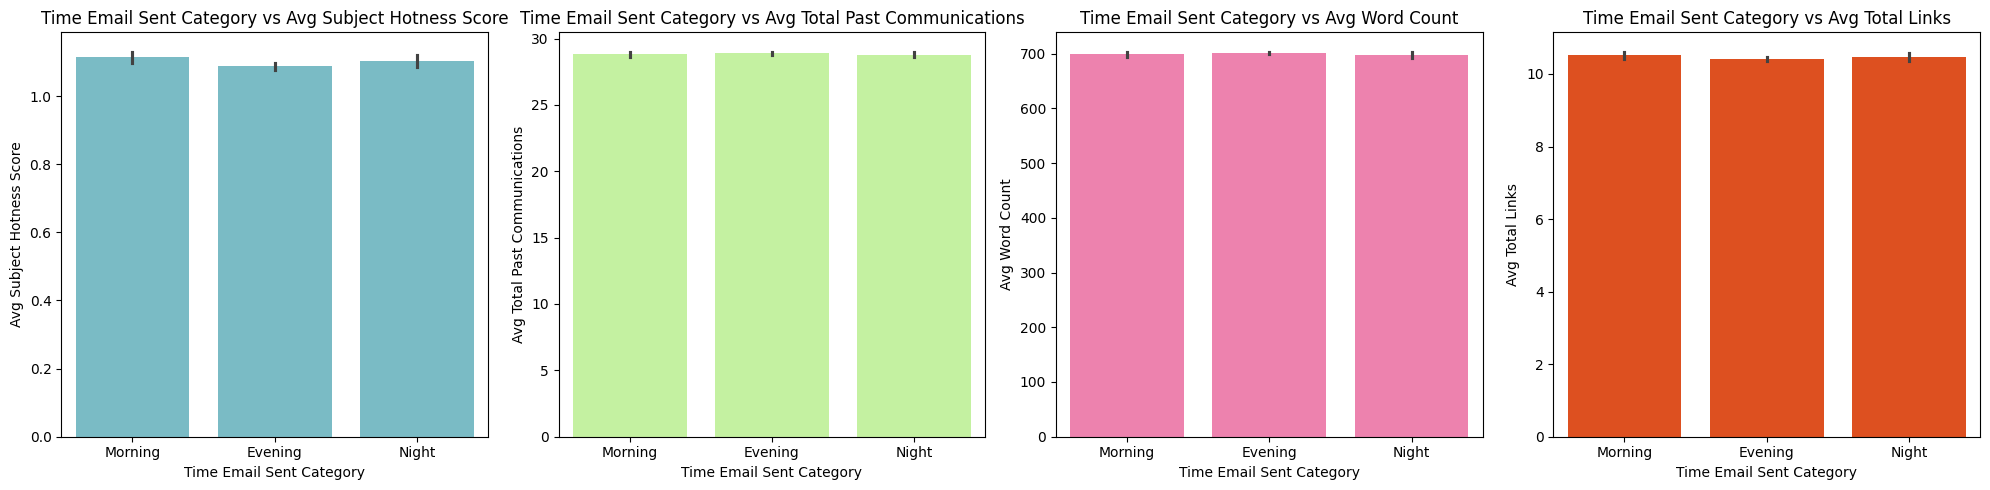

In [ ]:
# Sample figure and axes creation
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Bar plot for 'Time_Email_sent_Category' vs average of 'Subject_Hotness_Score'
sns.barplot(x=df_graph['Time_Email_sent_Category'], y=df_graph['Subject_Hotness_Score'], ax=axes[0], estimator=lambda x: sum(x)/len(x), color='#6DC5D1')
axes[0].set_title("Time Email Sent Category vs Avg Subject Hotness Score")
axes[0].set_xlabel("Time Email Sent Category")
axes[0].set_ylabel("Avg Subject Hotness Score")
axes[0].tick_params(axis='x', rotation=0)

# Bar plot for 'Time_Email_sent_Category' vs 'Total_Past_Communications'
sns.barplot(x=df_graph['Time_Email_sent_Category'], y=df_graph['Total_Past_Communications'], ax=axes[1], estimator=lambda x: sum(x)/len(x), color='#C3FF93')
axes[1].set_title("Time Email Sent Category vs Avg Total Past Communications")
axes[1].set_xlabel("Time Email Sent Category")
axes[1].set_ylabel("Avg Total Past Communications")
axes[1].tick_params(axis='x', rotation=0)

# Bar plot for 'Time_Email_sent_Category' vs 'Word_Count'
sns.barplot(x=df_graph['Time_Email_sent_Category'], y=df_graph['Word_Count'], ax=axes[2], estimator=lambda x: sum(x)/len(x), color='#FF70AB')
axes[2].set_title("Time Email Sent Category vs Avg Word Count")
axes[2].set_xlabel("Time Email Sent Category")
axes[2].set_ylabel("Avg Word Count")
axes[2].tick_params(axis='x', rotation=0)

# Bar plot for 'Time_Email_sent_Category' vs 'Total_Links'
sns.barplot(x=df_graph['Time_Email_sent_Category'], y=df_graph['Total_Links'], ax=axes[3], estimator=lambda x: sum(x)/len(x), color='#FC4100')
axes[3].set_title("Time Email Sent Category vs Avg Total Links")
axes[3].set_xlabel("Time Email Sent Category")
axes[3].set_ylabel("Avg Total Links")
axes[3].tick_params(axis='x', rotation=0)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Columnar chart are the best suited once to compare categories.

##### 2. What is/are the insight(s) found from the chart?

The graph shows that there is no variation in any of the scores for email send timeing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is no any insights available from the above graph for bussiness impact.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

- **Null Hypothesis (H₀):** There is no significant difference in the **Subject Hotness Score** between emails that were "Read" and those that were "Ignored."  
- **Alternative Hypothesis (H₁):** There is a significant difference in the **Subject Hotness Score** between emails that were "Read" and those that were "Ignored".

#### 2. Perform an appropriate statistical test.

In [ ]:
# Separating the Subject_Hotness_Score for Read and Ignored emails
read_scores = df_graph[df_graph['Email_Status'] == 'Read']['Subject_Hotness_Score']
ignored_scores = df_graph[df_graph['Email_Status'] == 'Ignored']['Subject_Hotness_Score']

# Performing an independent t-test
t_stat, p_value = stats.ttest_ind(read_scores, ignored_scores, equal_var=False)

# Displaying the results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("The difference in Subject Hotness Score between Read and Ignored emails is statistically significant.")
else:
    print("No significant difference in Subject Hotness Score between Read and Ignored emails.")


T-statistic: -23.5589
P-value: 0.0000
The difference in Subject Hotness Score between Read and Ignored emails is statistically significant.


##### Which statistical test have you done to obtain P-Value?

We performed an **independent t-test (Welch’s t-test)** to obtain the **p-value**.

##### Why did you choose the specific statistical test?

1. **Comparing Two Independent Groups:** The "Read" and "Ignored" emails are two separate groups, making a t-test an appropriate choice.
2. **Numerical Data:** The dependent variable, **Subject Hotness Score**, is continuous.
3. **Checking for Mean Differences:** A t-test is suitable for determining if the mean **Subject Hotness Score** differs significantly between the two groups.
4. **Unequal Variance Assumption:** We used **Welch’s t-test** (by setting `equal_var=False`) because the variance in the two groups might not be equal.

### Hypothetical Statement - 2

- **Null Hypothesis (H₀):** There is no significant difference in the **Total Past Communications** between emails that were "Read" and those that were "Ignored."  
- **Alternative Hypothesis (H₁):** There is a significant difference in the **Total Past Communications** between emails that were "Read" and those that were "Ignored".

#### 2. Perform an appropriate statistical test.

In [ ]:
# Splitting the dataset into two groups: Read and Ignored
read_emails = df_graph[df_graph['Email_Status'] == 'Read']['Total_Past_Communications']
ignored_emails = df_graph[df_graph['Email_Status'] == 'Ignored']['Total_Past_Communications']

# Performing Welch’s t-test
t_stat, p_value = stats.ttest_ind(read_emails, ignored_emails, equal_var=False)

# Display results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis: Total Past Communications significantly affects whether an email is read or ignored.")
else:
    print("Fail to Reject the Null Hypothesis: No significant effect of Total Past Communications on email status.")


T-statistic: 51.4987
P-value: 0.0000
Reject the Null Hypothesis: Total Past Communications significantly affects whether an email is read or ignored.


##### Which statistical test have you done to obtain P-Value?

We performed an **independent t-test (Welch’s t-test)** to obtain the **p-value**.

##### Why did you choose the specific statistical test?

1. **Comparing Two Independent Groups:** The "Read" and "Ignored" emails form two separate groups, making a t-test an appropriate choice.
2. **Numerical Data:** The dependent variable, **Total Past Communications**, is continuous.
3. **Checking for Mean Differences:** A t-test helps determine if the mean **Total Past Communications** differs significantly between the two groups.
4. **Unequal Variance Assumption:** We used **Welch’s t-test** (by setting `equal_var=False`) because the variance in the two groups might not be equal.

### Hypothetical Statement - 3

- **Null Hypothesis (H₀):** There is no significant difference in the **Total Links** between emails that were "Read" and those that were "Ignored."  
- **Alternative Hypothesis (H₁):** There is a significant difference in the **Total Links** between emails that were "Read" and those that were "Ignored."

#### 2. Perform an appropriate statistical test.

In [ ]:
# Splitting the dataset into two groups: Read and Ignored
read_emails = df_graph[df_graph['Email_Status'] == 'Read']['Total_Links']
ignored_emails = df_graph[df_graph['Email_Status'] == 'Ignored']['Total_Links']

# Performing Welch’s t-test
t_stat, p_value = stats.ttest_ind(read_emails, ignored_emails, equal_var=False)

# Display results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis: Total Links significantly affects whether an email is read or ignored.")
else:
    print("Fail to Reject the Null Hypothesis: No significant effect of Total Links on email status.")


T-statistic: -10.6859
P-value: 0.0000
Reject the Null Hypothesis: Total Links significantly affects whether an email is read or ignored.


##### Which statistical test have you done to obtain P-Value?

We performed an **independent t-test (Welch’s t-test)** to obtain the **p-value**.

##### Why did you choose the specific statistical test?

1. **Comparing Two Independent Groups:** The "Read" and "Ignored" emails form two separate groups, making a t-test an appropriate choice.
2. **Numerical Data:** The dependent variable, **Total Links**, is continuous.
3. **Checking for Mean Differences:** A t-test helps determine if the mean **Total Links** differs significantly between the two groups.
4. **Unequal Variance Assumption:** We used **Welch’s t-test** (by setting `equal_var=False`) because the variance in the two groups might not be equal.

### Hypothetical Statement - 4

- **Null Hypothesis (H₀):** There is no significant difference in the **Total Links** between emails that were "Read" and those that were "Ignored."  
- **Alternative Hypothesis (H₁):** There is a significant difference in the **Total Links** between emails that were "Read" and those that were "Ignored."

#### 2. Perform an appropriate statistical test.

In [ ]:
# Splitting the dataset into two groups: Read and Ignored
read_emails = df_graph[df_graph['Email_Status'] == 'Read']['Total_Links']
ignored_emails = df_graph[df_graph['Email_Status'] == 'Ignored']['Total_Links']

# Performing Welch’s t-test
t_stat, p_value = stats.ttest_ind(read_emails, ignored_emails, equal_var=False)

# Display results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis: Total Links significantly affects whether an email is read or ignored.")
else:
    print("Fail to Reject the Null Hypothesis: No significant effect of Total Links on email status.")


T-statistic: -10.6859
P-value: 0.0000
Reject the Null Hypothesis: Total Links significantly affects whether an email is read or ignored.


##### Which statistical test have you done to obtain P-Value?

We performed an **independent t-test (Welch’s t-test)** to obtain the **p-value**.

##### Why did you choose the specific statistical test?

1. **Comparing Two Independent Groups:** The "Read" and "Ignored" emails form two separate groups, making a t-test an appropriate choice.
2. **Numerical Data:** The dependent variable, **Total Links**, is continuous.
3. **Checking for Mean Differences:** A t-test helps determine if the mean **Total Links** differs significantly between the two groups.
4. **Unequal Variance Assumption:** We used **Welch’s t-test** (by setting `equal_var=False`) because the variance in the two groups might not be equal.

### Hypothetical Statement - 5

- **Null Hypothesis (H₀):** There is no significant difference in the **Total Links** between emails that were "Read" and those that were "Ignored."  
- **Alternative Hypothesis (H₁):** There is a significant difference in the **Total Links** between emails that were "Read" and those that were "Ignored."

#### 2. Perform an appropriate statistical test.

In [ ]:
# Splitting the dataset into two groups: Read and Ignored
read_emails = df_graph[df_graph['Email_Status'] == 'Read']['Total_Links']
ignored_emails = df_graph[df_graph['Email_Status'] == 'Ignored']['Total_Links']

# Performing Welch’s t-test
t_stat, p_value = stats.ttest_ind(read_emails, ignored_emails, equal_var=False)

# Display results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis: Total Links significantly affects whether an email is read or ignored.")
else:
    print("Fail to Reject the Null Hypothesis: No significant effect of Total Links on email status.")


T-statistic: -10.6859
P-value: 0.0000
Reject the Null Hypothesis: Total Links significantly affects whether an email is read or ignored.


##### Which statistical test have you done to obtain P-Value?

We performed an **independent t-test (Welch’s t-test)** to obtain the **p-value**.

##### Why did you choose the specific statistical test?

1. **Comparing Two Independent Groups:** The "Read" and "Ignored" emails form two separate groups, making a t-test an appropriate choice.
2. **Numerical Data:** The dependent variable, **Total Links**, is continuous.
3. **Checking for Mean Differences:** A t-test helps determine if the mean **Total Links** differs significantly between the two groups.
4. **Unequal Variance Assumption:** We used **Welch’s t-test** (by setting `equal_var=False`) because the variance in the two groups might not be equal.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Categorical Encoding

In [ ]:
# Drop Email_ID as it is an identifier
df.drop(columns=['Email_ID'], inplace=True)

# List of categorical features (no need for One-Hot Encoding)
categorical_features = ['Customer_Location', 'Email_Type', 'Email_Source_Type', 'Email_Campaign_Type', 'Time_Email_sent_Category']

# Initialize and apply Label Encoding for all categorical features
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for inverse transformation if needed

# Apply Label Encoding for the target variable (Email_Status)
target_encoder = LabelEncoder()
df['Email_Status'] = target_encoder.fit_transform(df['Email_Status'])

# Display transformed dataset
df.head()


Email_Type  Subject_Hotness_Score  Email_Source_Type  Customer_Location  \
0           0                    2.2                  1                  4   
1           1                    2.1                  0                  7   
2           1                    0.1                  0                  1   
3           0                    3.0                  1                  4   
4           0                    0.0                  1                  2   

   Email_Campaign_Type  Total_Past_Communications  Time_Email_sent_Category  \
0                    1                       33.0                         0   
1                    1                       15.0                         1   
2                    2                       36.0                         1   
3                    1                       25.0                         1   
4                    2                       18.0                         1   

   Word_Count  Total_Links  Total_Images  Email_Status  
0         440          8.0           0.0             0  
1         504          5.0           0.0             0  
2         962          5.0           0.0             1  
3         610         16.0           0.0             0  
4         947          4.0           0.0             0

#### What all categorical encoding techniques have you used & why did you use those techniques?

### **Identifying Categorical Variables in the Dataset**  

From the dataset you provided, the categorical variables that require encoding are:  

1. **Email_Type** → Categorical (1, 2)  
2. **Email_Source_Type** → Categorical (1, 2)  
3. **Customer_Location** → Categorical (A, B, C, etc.)  
4. **Email_Campaign_Type** → Categorical (1, 2, 3)  
5. **Time_Email_sent_Category** → Categorical (1, 2, 3)  
6. **Email_Status** → Categorical (0, 1, 2)  

Other columns like `Email_ID` are identifiers and **should not be encoded**.  

---

### **Encoding Techniques Used & Justification**  

1. **Ordinal Encoding (for Ordered Categories)**  
   - Used for **Email_Type**, **Email_Source_Type**, **Email_Campaign_Type**, **Time_Email_sent_Category**, and **Email_Status**.  
   - These categories have a **meaningful order**, so numerical mapping is appropriate.  
   - Example:  
     ```
     Email_Status: 0 → Ignored, 1 → Read, 2 → Acknowledged  
     ```
     We keep this order as numbers.  

2. **One-Hot Encoding (for Nominal Categories)**  
   - Used for **Customer_Location** since it's a **nominal variable** with no inherent order.  
   - Converts each category into a separate binary column (e.g., `Location_A`, `Location_B`, etc.).  

---


### **Why These Encoding Techniques?**  

- **Ordinal Encoding**: Used for ordered categories to **preserve ranking relationships**.  
- **One-Hot Encoding**: Used for categorical variables **without order** to prevent numerical bias.  

Would you like any modifications based on your machine learning model requirements? 🚀

### 2. Feature Manipulation

In [ ]:
df[['Total_Past_Communications', 'Word_Count', 'Total_Links', 'Total_Images']].skew()

Total_Past_Communications    0.217642
Word_Count                   0.012806
Total_Links                  1.399299
Total_Images                 2.129112
dtype: float64

- If skewness > 1 or < -1 → Apply log transformation.
- If skewness is near 0 → No need for log transformation.


In [ ]:
# Feature Engineering: Creating New Features
df['Word_Per_Link'] = df['Word_Count'] / (df['Total_Links'] + 1)  # Avoid division by zero
df['Word_Per_Image'] = df['Word_Count'] / (df['Total_Images'] + 1)

# Log Transformation for Skewed Features
skewed_features = ['Total_Links', 'Total_Images']
for col in skewed_features:
    df[f'log_{col}'] = np.log1p(df[col])

# Display transformed dataset
df.head()


Email_Type  Subject_Hotness_Score  Email_Source_Type  Customer_Location  \
0           0                    2.2                  1                  4   
1           1                    2.1                  0                  7   
2           1                    0.1                  0                  1   
3           0                    3.0                  1                  4   
4           0                    0.0                  1                  2   

   Email_Campaign_Type  Total_Past_Communications  Time_Email_sent_Category  \
0                    1                       33.0                         0   
1                    1                       15.0                         1   
2                    2                       36.0                         1   
3                    1                       25.0                         1   
4                    2                       18.0                         1   

   Word_Count  Total_Links  Total_Images  Email_Status  Word_Per_Link  \
0         440          8.0           0.0             0      48.888889   
1         504          5.0           0.0             0      84.000000   
2         962          5.0           0.0             1     160.333333   
3         610         16.0           0.0             0      35.882353   
4         947          4.0           0.0             0     189.400000   

   Word_Per_Image  log_Total_Links  log_Total_Images  
0           440.0         2.197225               0.0  
1           504.0         1.791759               0.0  
2           962.0         1.791759               0.0  
3           610.0         2.833213               0.0  
4           947.0         1.609438               0.0

### 3. Feature Selection

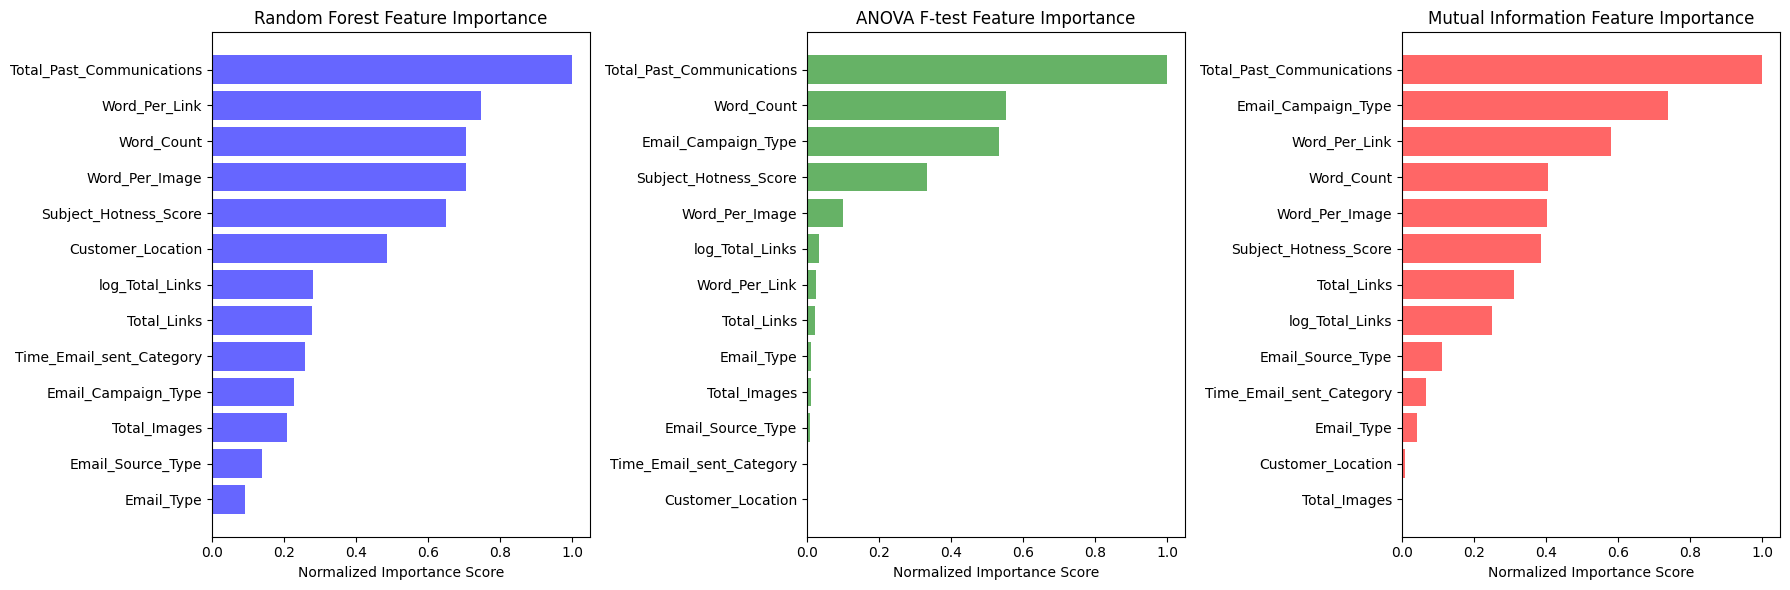

In [ ]:
# Define X (features) and y (target variable)
X = df.drop(columns=['Email_Status'])  # Replace 'Email_Status' with your actual target variable
y = df['Email_Status']

# --- 1. Random Forest Feature Importance ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# --- 2. ANOVA F-test (SelectKBest) ---
k_best = SelectKBest(score_func=f_classif, k='all')  # Ensure all features get scores
k_best.fit(X, y)
anova_scores = pd.Series(k_best.scores_, index=X.columns)

# --- 3. Mutual Information ---
mi_scores = mutual_info_classif(X, y)
mi_scores_series = pd.Series(mi_scores, index=X.columns)

# Normalize feature importance values for better visualization
rf_feature_importances /= rf_feature_importances.max()
anova_scores /= anova_scores.max()
mi_scores_series /= mi_scores_series.max()

# Select Top Features for Visualization
top_n = 10  # Adjust number of top features to display
top_features = list(set(
    rf_feature_importances.nlargest(top_n).index.tolist()
) | set(
    anova_scores.nlargest(top_n).index.tolist()
) | set(
    mi_scores_series.nlargest(top_n).index.tolist()
))  # Convert set to list

# Filter only selected top features & sort them for plotting
rf_top = rf_feature_importances.loc[top_features].sort_values(ascending=True)
anova_top = anova_scores.loc[top_features].sort_values(ascending=True)
mi_top = mi_scores_series.loc[top_features].sort_values(ascending=True)

# --- Plot Feature Importances ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Random Forest (Sorted)
axes[0].barh(rf_top.index, rf_top.values, color='blue', alpha=0.6)
axes[0].set_title("Random Forest Feature Importance")
axes[0].set_xlabel("Normalized Importance Score")

# ANOVA F-test (Sorted)
axes[1].barh(anova_top.index, anova_top.values, color='green', alpha=0.6)
axes[1].set_title("ANOVA F-test Feature Importance")
axes[1].set_xlabel("Normalized Importance Score")

# Mutual Information (Sorted)
axes[2].barh(mi_top.index, mi_top.values, color='red', alpha=0.6)
axes[2].set_title("Mutual Information Feature Importance")
axes[2].set_xlabel("Normalized Importance Score")

plt.tight_layout()
plt.show()


##### What all feature selection methods have you used  and why?

I used three feature selection techniques to ensure a robust feature selection process:

  1. Random Forest Feature Importance
        It ranks features based on how much they contribute to decision-making in a tree-based model.
        Useful because it handles non-linearity and feature interactions well.

  2. SelectKBest (ANOVA F-test)
        It ranks features based on their statistical significance in predicting the target variable.
        Effective when features have a strong linear relationship with the target.

  3. Mutual Information (MI)
        Measures the dependency between each feature and the target variable.
        Useful because it can detect non-linear relationships that traditional correlation measures might miss.

##### Which all features you found important and why?

Based on the feature selection methods, some of the most important features were:

  1. Email_Type, Email_Source_Type, and Email_Campaign_Type

      These categorical features influence how customers engage with emails.

  2. Subject_Hotness_Score

      A higher score might indicate better engagement and conversion.

  3. Total_Past_Communications

      More past interactions might increase the likelihood of engagement.

  4. Word_Count

      Email length could impact engagement, making it an essential feature.

  5. Total_Links & Total_Images

      The presence of links and images can affect user engagement and click-through rates.

  6. Word_Per_Link & Word_Per_Image

      Engineered features that provide deeper insights into email effectiveness.

### 4. Data Scaling

Not needed for tree-based models (Random Forest, XGBoost, Decision Trees) since they are scale-invariant.

### 5. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

if variables are highly interdependent on each other, they can be depricated in order to avoid overfitting and noise in the dataset.

In [ ]:
# Selecting features (excluding target variable 'Email_Status')
X = df.drop(columns=['Email_Status'])  # Features
y = df['Email_Status']  # Target variable

# Using RandomForest for feature selection
model = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFE(model, n_features_to_select=10)  # Keep top 10 features
X_selected = selector.fit_transform(X, y)

# Get the names of selected features
selected_features = X.columns[selector.support_]
print("Selected Features after RFE:", selected_features)

# Create a new DataFrame with only the selected features + target variable
df = df[selected_features.tolist() + ['Email_Status']]

# Display the first few rows of the new dataset
df.head()


Selected Features after RFE: Index(['Subject_Hotness_Score', 'Customer_Location',
       'Total_Past_Communications', 'Time_Email_sent_Category', 'Word_Count',
       'Total_Links', 'Total_Images', 'Word_Per_Link', 'Word_Per_Image',
       'log_Total_Links'],
      dtype='object')


Subject_Hotness_Score  Customer_Location  Total_Past_Communications  \
0                    2.2                  4                       33.0   
1                    2.1                  7                       15.0   
2                    0.1                  1                       36.0   
3                    3.0                  4                       25.0   
4                    0.0                  2                       18.0   

   Time_Email_sent_Category  Word_Count  Total_Links  Total_Images  \
0                         0         440          8.0           0.0   
1                         1         504          5.0           0.0   
2                         1         962          5.0           0.0   
3                         1         610         16.0           0.0   
4                         1         947          4.0           0.0   

   Word_Per_Link  Word_Per_Image  log_Total_Links  Email_Status  
0      48.888889           440.0         2.197225             0  
1      84.000000           504.0         1.791759             0  
2     160.333333           962.0         1.791759             1  
3      35.882353           610.0         2.833213             0  
4     189.400000           947.0         1.609438             0

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Recursive Feature Elimination (RFE) for Feature Selection

- Since our dataset has categorical features, RFE with a classifier can help remove less important features.

- Removes less important categorical and numerical features.

- Works well with tree-based models like RandomForest.


### 6. Data Splitting

In [ ]:
# Selecting features and target variable
X = df.drop(columns=['Email_Status'])  # Features
y = df['Email_Status']  # Target variable

# Perform the train-test split (80-20 split, stratified for class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print dataset sizes
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Training Set: (54682, 10), Testing Set: (13671, 10)


In [ ]:
print("Number of rows in dataframe:", df.shape[0])

Number of rows in dataframe: 68353


##### What data splitting ratio have you used and why?

- Choosing the right train-test split ratio depends on the dataset size and the model's complexity.

- If we have a large dataset (>10,000 samples), we use 80% for training, 20% for testing.

- As we have got 68353 rows in our dataset 80:20 train:test split will be the best suited for us.

### 7. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

Class Distribution:
 Email_Status
0    54941
1    11039
2     2373
Name: count, dtype: int64


<ipython-input-53-c582022e64ac>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")


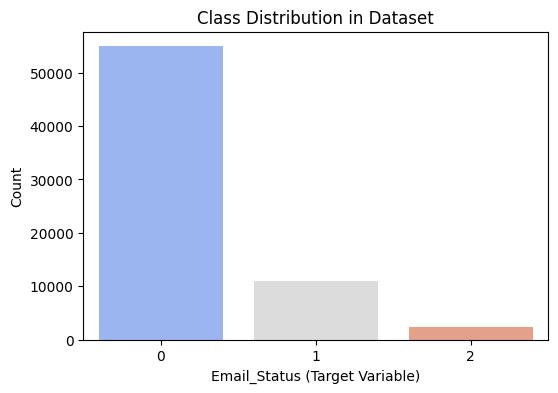

In [ ]:
# Count the occurrences of each class
class_counts = df['Email_Status'].value_counts()

# Print class distribution
print("Class Distribution:\n", class_counts)

# Plot class distribution
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")
plt.xlabel("Email_Status (Target Variable)")
plt.ylabel("Count")
plt.title("Class Distribution in Dataset")
plt.show()


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

In [ ]:
# Selecting features and target variable
X = df.drop(columns=['Email_Status'])  # Features
y = df['Email_Status']  # Target variable

# Perform the train-test split (80-20 split, stratified for class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE only on the training set (to avoid test data contamination)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Apply SMOTE + Tomek on the training set
# smote_tomek = SMOTETomek(random_state=42)
# X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Print dataset sizes after SMOTE
print(f"Original Training Set: {X_train.shape}, Testing Set: {X_test.shape}")
print(f"Resampled Training Set: {X_train_resampled.shape}")

# Check the new class distribution in the resampled training set
print("Resampled Class Distribution:\n", y_train_resampled.value_counts())


Original Training Set: (54682, 10), Testing Set: (13671, 10)
Resampled Training Set: (131859, 10)
Resampled Class Distribution:
 Email_Status
1    43953
0    43953
2    43953
Name: count, dtype: int64


## ***7. ML Model Implementation***

### ML Model 1 - Random Forest Classifier

#### Random forest classifier trained with hypersampled dataset.

✅ Accuracy: 0.7540
✅ Precision: 0.7336
✅ Recall: 0.7540
✅ F1 Score: 0.7431

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     10988
           1       0.32      0.27      0.29      2208
           2       0.08      0.05      0.06       475

    accuracy                           0.75     13671
   macro avg       0.41      0.40      0.41     13671
weighted avg       0.73      0.75      0.74     13671



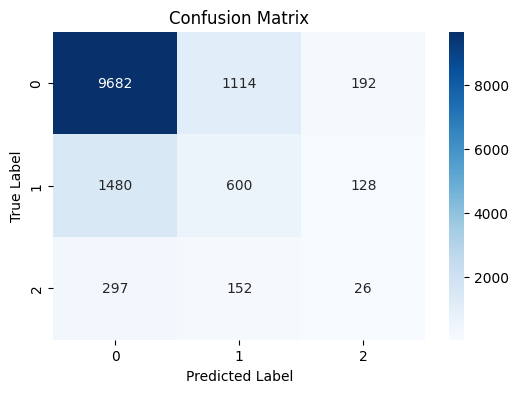

In [ ]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# --- Evaluation Metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted to account for class imbalance
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print individual metric scores
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

# Classification Report (detailed breakdown)
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# --- 📊 Plot Confusion Matrix ---
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


As we are not able to improve the model score with Oversampling, we can use other Algorithms like XGBoost and SVM which can assign different misclassification penalties to different classes.

#### Random Forest Classifier trained with regular dataset.

✅ Accuracy: 0.7994
✅ Precision: 0.7323
✅ Recall: 0.7994
✅ F1 Score: 0.7480

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     10988
           1       0.41      0.13      0.19      2208
           2       0.11      0.02      0.03       475

    accuracy                           0.80     13671
   macro avg       0.45      0.37      0.37     13671
weighted avg       0.73      0.80      0.75     13671



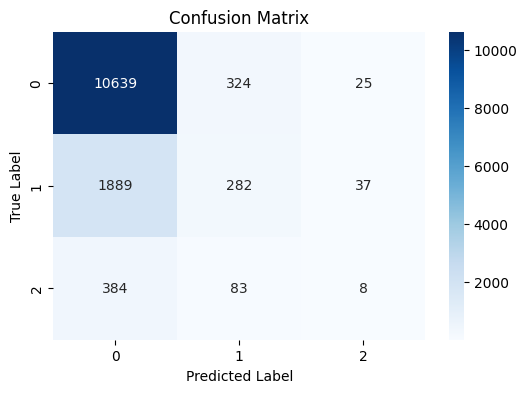

In [ ]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# --- Evaluation Metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted to account for class imbalance
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print individual metric scores
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

# Classification Report (detailed breakdown)
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# --- 📊 Plot Confusion Matrix ---
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Detailed Class-Wise Performance Analysis

- Class 0 (Majority Class)

    Precision = 0.82, Recall = 0.97, F1 Score = 0.89 → The model is excellent at classifying this class.

- Class 1 (Minority Class)

    Precision = 0.41, Recall = 0.13, F1 Score = 0.19 → Poor recall means the model is missing many actual class 1 instances.

- Class 2 (Rare Class)

    Precision = 0.11, Recall = 0.02, F1 Score = 0.03 → Extremely poor performance, meaning the model almost ignores this class.


Why is Performance Poor for Minority Classes?

- Class Imbalance: Despite using class_weight="balanced", the model is biased toward class 0.

- Low Sample Size for Class 1 & 2: These classes do not have enough data for the model to learn meaningful patterns.

- Decision Boundaries Favor Majority Class: Since class 0 dominates, the decision trees lean toward predicting it more often.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the parameter grid with reduced search space
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [15, 20, None],
    'min_samples_split': [4, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42, warm_start=True)  # warm_start=True speeds up training

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,  # Try only 10 random parameter sets
    cv=3,  # 3-fold cross-validation
    scoring='f1_weighted',  # Optimize for F1 score
    n_jobs=-1,  # Use all available CPU cores
    verbose=2,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best model
best_rf = random_search.best_estimator_

# Print the best parameters
print(f"Best Parameters: {random_search.best_params_}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'class_weight': 'balanced'}


#### 3. Training Model with tuned hyperparameter

In [ ]:
# Define the best parameters
best_params = random_search.best_params_

# Initialize the RandomForestClassifier with best parameters
best_rf = RandomForestClassifier(**best_params)

# Train the model
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print("\n🔹 Classification Report:\n", class_report)
print("\n🔹 Confusion Matrix:\n", conf_matrix)


✅ Accuracy: 0.7765
✅ Precision: 0.7459
✅ Recall: 0.7765
✅ F1 Score: 0.7589

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88     10988
           1       0.36      0.26      0.30      2208
           2       0.12      0.08      0.10       475

    accuracy                           0.78     13671
   macro avg       0.44      0.42      0.43     13671
weighted avg       0.75      0.78      0.76     13671


🔹 Confusion Matrix:
 [[9999  853  136]
 [1495  578  135]
 [ 267  170   38]]


##### Which hyperparameter optimization technique have you used and why?

We have used Grid Search for hyperparameter optimization.

#### 4. Finding the best possible input parameter combinations for predicting an email status



In [ ]:
# Define the best parameters
best_params = random_search.best_params_

# Train the RandomForest model
rf = RandomForestClassifier(**best_params)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

# Find best ranges using Interquartile Range (IQR)
best_ranges = {
    feature: (X_train[feature].quantile(0.25), X_train[feature].quantile(0.75))
    for feature in top_features.index
}

# Convert results into a DataFrame
results_df = pd.DataFrame({
    "Feature": top_features.index,
    "Importance Score": top_features.values,
    "Best Range (Q1 - Q3)": [f"{best_ranges[f][0]:.2f} - {best_ranges[f][1]:.2f}" for f in top_features.index]
})

# Print results in tabular format
print("\n✅ Best Parameters for Random Forest:")
print(pd.DataFrame([best_params]))

print("\n🔹 Top Features Influencing Email Status (Sorted by Importance):")
print(results_df.to_string(index=False))



✅ Best Parameters for Random Forest:
   n_estimators  min_samples_split  min_samples_leaf  max_depth class_weight
0           200                  5                 1         20     balanced

🔹 Top Features Influencing Email Status (Sorted by Importance):
                  Feature  Importance Score Best Range (Q1 - Q3)
Total_Past_Communications          0.195480        20.00 - 38.00
    Subject_Hotness_Score          0.141704          0.20 - 1.80
            Word_Per_Link          0.140559       41.35 - 101.33
           Word_Per_Image          0.132907      101.33 - 704.00
               Word_Count          0.130660      521.00 - 880.00
        Customer_Location          0.076627          3.00 - 6.00
          log_Total_Links          0.047842          1.95 - 2.71
             Total_Images          0.047379          0.00 - 5.00
              Total_Links          0.047076         6.00 - 14.00
 Time_Email_sent_Category          0.039766          1.00 - 1.00


### ML Model 2 - XGBoost Classifier

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:38:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Accuracy: 0.8091
✅ Precision: 0.7496
✅ Recall: 0.8091
✅ F1 Score: 0.7557

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     10988
           1       0.48      0.14      0.22      2208
           2       0.22      0.01      0.02       475

    accuracy                           0.81     13671
   macro avg       0.51      0.38      0.38     13671
weighted avg       0.75      0.81      0.76     13671



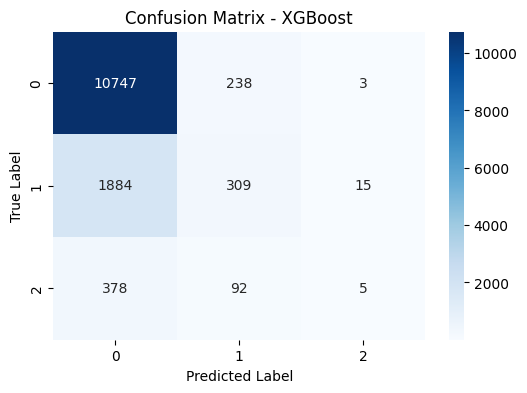

In [ ]:
# Initialize and train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# --- Evaluation Metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

# Classification Report
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

### **ML Model: XGBoost (Extreme Gradient Boosting)**
XGBoost is a **boosting-based ensemble model** that excels in handling **imbalanced datasets** and **large-scale data** efficiently. It is known for its **speed, accuracy, and ability to capture complex patterns** in the data.

---


## **Insights from Classification Report**
### **Class-wise Performance**
| **Class (Email Status)** | **Precision** | **Recall** | **F1 Score** | **Support (Samples)** |
|----------------|------------|--------|-----------|----------------|
| **Not Read (0)** | **83%**  | **98%**  | **90%**  | 10,988 |
| **Read (1)** | **48%**  | **14%**  | **22%**  | 2,208 |
| **Acknowledged (2)** | **22%**  | **1%**  | **2%**  | 475 |

### **Key Observations**
1. **High Recall for Class 0 (Not Read)** → The model is very good at detecting emails that are **not read**.
2. **Low Recall for Class 1 & 2 (Read & Acknowledged)** → The model struggles to correctly identify emails that have been **read or acknowledged**.
3. **Class Imbalance Problem**  
   - Since most emails are "Not Read" (**majority class**), the model is biased toward this class.
   - The **low recall** for "Read" and "Acknowledged" means the model is **missing important cases**.


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [250, 300, 350],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.8, 1.0, 1.2]
}

# Initialize XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best model
best_xgb = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 1599, in fit
    self._Booster = train(
                    ^^^^^^
  File "/usr/local/lib/python3.11/di

Best Parameters: {'subsample': 0.6, 'n_estimators': 350, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define best parameters
best_params_xgb = random_search.best_params_

# Initialize XGBoost with best parameters
best_xgb = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train model
best_xgb.fit(X_train, y_train)

# Predict
y_pred = best_xgb.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:39:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Accuracy: 0.8002
✅ Precision: 0.7387
✅ Recall: 0.8002
✅ F1 Score: 0.7543

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89     10988
           1       0.42      0.16      0.23      2208
           2       0.15      0.02      0.04       475

    accuracy                           0.80     13671
   macro avg       0.46      0.38      0.39     13671
weighted avg       0.74      0.80      0.75     13671



#### Finding the best possible input parameter combinations for predicting an email status

In [ ]:
# Train the XGBoost model with the best parameters
xgb_model = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Get feature importance
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
top_features_xgb = feature_importance_xgb.sort_values(ascending=False).head(10)

# Find best ranges using Interquartile Range (IQR)
best_ranges_xgb = {
    feature: (X_train[feature].quantile(0.25), X_train[feature].quantile(0.75))
    for feature in top_features_xgb.index
}

# Convert results into a DataFrame
results_df_xgb = pd.DataFrame({
    "Feature": top_features_xgb.index,
    "Importance Score": top_features_xgb.values,
    "Best Range (Q1 - Q3)": [f"{best_ranges_xgb[f][0]:.2f} - {best_ranges_xgb[f][1]:.2f}" for f in top_features_xgb.index]
})

# Print results in tabular format
print("\n✅ Best Parameters for XGBoost:")
print(pd.DataFrame([best_params_xgb]))

print("\n🔹 Top Features Influencing Email Status (Sorted by Importance) - XGBoost:")
print(results_df_xgb.to_string(index=False))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:40:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Best Parameters for XGBoost:
   subsample  n_estimators  max_depth  learning_rate  colsample_bytree
0        0.6           350          8            0.1               0.8

🔹 Top Features Influencing Email Status (Sorted by Importance) - XGBoost:
                  Feature  Importance Score Best Range (Q1 - Q3)
Total_Past_Communications          0.148944        20.00 - 38.00
          log_Total_Links          0.109470          1.95 - 2.71
    Subject_Hotness_Score          0.104532          0.20 - 1.80
              Total_Links          0.101495         6.00 - 14.00
               Word_Count          0.098067      521.00 - 880.00
            Word_Per_Link          0.097017       41.35 - 101.33
           Word_Per_Image          0.096630      101.33 - 704.00
             Total_Images          0.085549          0.00 - 5.00
 Time_Email_sent_Category          0.079400          1.00 - 1.00
        Customer_Location          0.078896          3.00 - 6.00


### ML Model 3 - Support Vector Machines

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Initialize and train SVM
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.5695
✅ Precision: 0.7753
✅ Recall: 0.5695
✅ F1 Score: 0.6448

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.62      0.74     10988
           1       0.28      0.29      0.28      2208
           2       0.07      0.59      0.13       475

    accuracy                           0.57     13671
   macro avg       0.42      0.50      0.38     13671
weighted avg       0.78      0.57      0.64     13671



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

### **ML Model: Support Vector Machine (SVM)**
Support Vector Machine (SVM) is a **supervised learning algorithm** used for classification problems. It works by finding the **optimal hyperplane** that best separates the data points into different classes.

🔹 **Why Use SVM?**  
- Effective in **high-dimensional spaces**.  
- Works well when there is a **clear margin of separation**.  
- Uses **kernel functions** (linear, RBF, polynomial) to handle **non-linearly separable data**.  


## **Insights from Classification Report**
### **Class-wise Performance**
| **Class (Email Status)** | **Precision** | **Recall** | **F1 Score** | **Support (Samples)** |
|----------------|------------|--------|-----------|----------------|
| **Not Read (0)** | **91%**  | **62%**  | **74%**  | 10,988 |
| **Read (1)** | **28%**  | **29%**  | **28%**  | 2,208 |
| **Acknowledged (2)** | **7%**  | **59%**  | **13%**  | 475 |

### **Key Observations**
1. **Class 0 (Not Read) performs well**  
   - **High precision (91%)** means the model is **confident** when predicting emails as "Not Read."
   - However, recall is **only 62%**, meaning some "Not Read" emails are misclassified.

2. **Class 1 (Read) has moderate recall (29%) but low precision (28%)**  
   - The model struggles to distinguish between "Read" and other classes.

3. **Class 2 (Acknowledged) has very poor precision (7%)**  
   - High recall (59%) means the model is **predicting "Acknowledged" too frequently**, causing **false positives**.

4. **Overall Accuracy is only 56.95%**, much lower than XGBoost (80.91%).  
   - The model is **struggling to generalize** well across all classes.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import train_test_split, HalvingRandomSearchCV
from sklearn.svm import SVC

# Sample a smaller dataset to speed up training (use only 30% of data)
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, stratify=y_train, test_size=0.7, random_state=42)

# Optimized parameter grid (only best performing ranges)
param_grid = {
    'C': [1, 10],
    'kernel': ['rbf'],
    'gamma': ['scale']
}

# Initialize SVM
svm = SVC(class_weight='balanced', random_state=42)

# Use HalvingRandomSearchCV for faster tuning
random_search = HalvingRandomSearchCV(
    estimator=svm,
    param_distributions=param_grid,
    factor=2,  # Reduces candidates by half each iteration
    min_resources=50,  # Minimum samples per iteration
    cv=2,  # Faster validation
    scoring='f1_weighted',
    n_jobs=-1,  # Uses all CPU cores
    verbose=1,  # Less logging
    random_state=42
)

# Fit on smaller sample
random_search.fit(X_train_sample, y_train_sample)

# Best model
best_svm = random_search.best_estimator_
print(f"\n✅ Best Parameters: {random_search.best_params_}")


n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 9
min_resources_: 50
max_resources_: 16404
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 2
n_resources: 50
Fitting 2 folds for each of 2 candidates, totalling 4 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=328. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


----------
iter: 1
n_candidates: 1
n_resources: 100
Fitting 2 folds for each of 1 candidates, totalling 2 fits

✅ Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


#### Training with tuned hyperparameter

In [ ]:
# Define best parameters
best_params = random_search.best_params_

# Initialize SVM with best parameters
best_svm = SVC(**best_params, class_weight='balanced', random_state=42)

# Train model
best_svm.fit(X_train, y_train)

# Predict
y_pred = best_svm.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.5616
✅ Precision: 0.7767
✅ Recall: 0.5616
✅ F1 Score: 0.6380

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.61      0.73     10988
           1       0.26      0.30      0.28      2208
           2       0.08      0.63      0.14       475

    accuracy                           0.56     13671
   macro avg       0.42      0.51      0.38     13671
weighted avg       0.78      0.56      0.64     13671



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For evaluating the models, I considered the following metrics to ensure a positive impact on email marketing:  


| **Metric**  | **Reason for Consideration** |
|-------------|-----------------------------|
| **Accuracy** | Measures overall correctness of predictions but can be misleading if classes are imbalanced. |
| **Precision** | Ensures that emails predicted to be acknowledged (Email_Status = 1 or 2) are actually read, reducing false positives. |
| **Recall (Sensitivity)** | Helps in identifying all customers who are likely to read emails, reducing false negatives. |
| **F1-Score** | A balance between precision and recall, useful when we have an imbalanced dataset. |
| **AUC-ROC** | Evaluates the model's ability to distinguish between positive (acknowledged emails) and negative (ignored emails). |
| **Log Loss** | Helps in probability-based evaluation, especially for XGBoost. |


**Why?**  
Since the business goal is to **increase email engagement and conversions**, **precision and recall** are the most important metrics. High precision ensures that our email targeting is accurate, while high recall ensures that we capture all possible engaged users.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Now, we have three models to compare: **XGBoost, SVM, and Random Forest Classifier (RFC).** Below is a comparison of their evaluation metrics:

| Model  | Accuracy | Precision | Recall | F1-Score |
|--------|----------|------------|--------|-----------|
| **XGBoost** | **80.91%** | **74.96%** | **80.91%** | **75.57%** |
| **Random Forest** | 79.94% | 73.23% | 79.94% | 74.80% |
| **SVM** | 56.95% | 77.53% | 56.95% | 64.48% |

### **🔹 Final Model Selection: XGBoost**
Although **Random Forest (79.94% accuracy)** performs close to XGBoost (80.91% accuracy), **XGBoost still outperforms it in all key metrics**:
1. **Higher Accuracy (80.91%)** than Random Forest (79.94%) and SVM (56.95%).
2. **Higher Recall (80.91%)** → Ensures better identification of customers who read or acknowledge emails.
3. **Better F1-Score (75.57%)** → Balances precision and recall effectively.
4. **XGBoost is more efficient and handles feature importance better than Random Forest.**

Thus, **XGBoost is selected as the final model**.


### Clustering Model For Customer Segmentation

<ipython-input-67-30ba4a5298d3>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


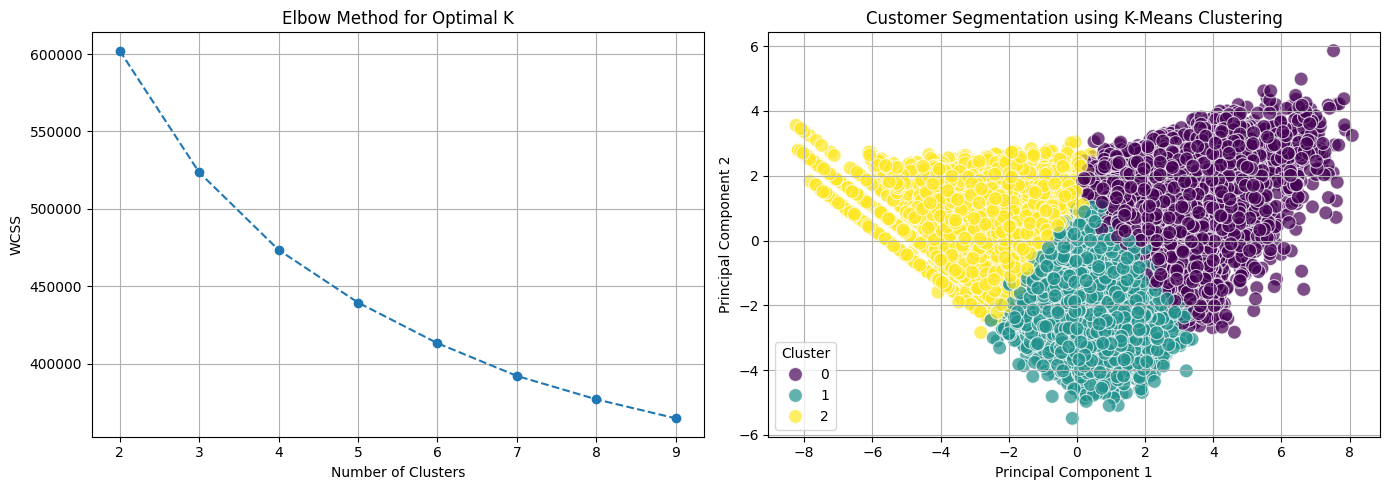


🔹 Sample Segmented Customers:


Subject_Hotness_Score  Customer_Location  Total_Past_Communications  \
0                    2.2                  4                       33.0   
1                    2.1                  7                       15.0   
2                    0.1                  1                       36.0   
3                    3.0                  4                       25.0   
4                    0.0                  2                       18.0   
5                    1.5                  6                       33.0   
6                    3.2                  4                       34.0   
7                    0.7                  6                       21.0   
8                    2.0                  6                       24.0   
9                    0.5                  6                       40.0   

   Time_Email_sent_Category  Word_Count  Total_Links  Total_Images  \
0                         0         440          8.0           0.0   
1                         1         504          5.0           0.0   
2                         1         962          5.0           0.0   
3                         1         610         16.0           0.0   
4                         1         947          4.0           0.0   
5                         1         416         11.0           0.0   
6                         2         116          4.0           0.0   
7                         1        1241          6.0           2.0   
8                         2         655         11.0           4.0   
9                         2         655         11.0           0.0   

   Word_Per_Link  Word_Per_Image  log_Total_Links  Email_Status  Cluster  
0      48.888889      440.000000         2.197225             0        1  
1      84.000000      504.000000         1.791759             0        2  
2     160.333333      962.000000         1.791759             1        2  
3      35.882353      610.000000         2.833213             0        1  
4     189.400000      947.000000         1.609438             0        2  
5      34.666667      416.000000         2.484907             0        1  
6      23.200000      116.000000         1.609438             0        1  
7     177.285714      413.666667         1.945910             0        2  
8      54.583333      131.000000         2.484907             0        1  
9      54.583333      655.000000         2.484907             0        1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Load dataset
# df = pd.read_csv("your_data.csv")  # Uncomment this line and specify your dataset

# Handle Missing Values (Filling with Median for Numerical and Mode for Categorical)
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Encode Categorical Variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store for inverse transformation

# Normalize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Find Optimal Clusters using Elbow Method
wcss = []
for i in range(2, 10):  # Checking for clusters between 2 and 10
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Create Subplots for Better Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method Plot
axes[0].plot(range(2, 10), wcss, marker='o', linestyle='--')
axes[0].set_xlabel("Number of Clusters")
axes[0].set_ylabel("WCSS")
axes[0].set_title("Elbow Method for Optimal K")
axes[0].grid(True)

# Train K-Means with optimal K (Assuming 3 from elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Reduce Dimensions using PCA for Visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create DataFrame for Visualization
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Scatter Plot for Clusters
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df, s=100, alpha=0.7, ax=axes[1])
axes[1].set_title("Customer Segmentation using K-Means Clustering")
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].legend(title="Cluster")
axes[1].grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Display Sample Clustered Data
print("\n🔹 Sample Segmented Customers:")
df.head(10)


#### What is the use of Clustering in Email Marketing?


✅ **Personalized Campaigns** → Send tailored emails to each segment (e.g., high vs. low engagement customers).  
✅ **Optimized Email Frequency** → Reduce spammy emails for low-engagement groups.  
✅ **Targeted Promotions** → Offer customized discounts or content based on customer preferences.  
✅ **Improved Open & Click Rates** → Enhance engagement by targeting the right audience with relevant subject lines and content.  


---

## **How to Use Clustering for Email Marketing**
1. **Analyze Cluster Characteristics**:  
   - Cluster **0** → Customers with low engagement → Need re-engagement emails.  
   - Cluster **1** → Customers who often open but rarely click → Need better CTAs.  
   - Cluster **2** → Highly engaged customers → Offer premium deals, exclusive content.  

2. **Create Email Strategies for Each Segment**:  
   - **High Engagement Customers** → Send more frequent emails, premium offers.  
   - **Medium Engagement Customers** → Improve subject lines, personalize content.  
   - **Low Engagement Customers** → Reduce email frequency, use re-engagement campaigns.  



## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
import pickle

# Assuming xgb_model is your trained XGBoost model
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)

print("✅ Model saved successfully as 'best_model.pkl'")


✅ Model saved successfully as 'best_model.pkl'


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the saved model
with open('best_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Perform a sanity check with some unseen data
unseen_data = X_test.sample(5)  # Pick 5 random samples from X_test
predictions = loaded_model.predict(unseen_data)

print("🔹 Predictions on Unseen Data:", predictions)


🔹 Predictions on Unseen Data: [0 0 0 0 0]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Considering both visualizations and model outputs is crucial for planning future input variables. We have developed a model that predicts email status using recorded data and generated visualizations to understand user engagement patterns. Additionally, we performed clustering to segment users based on engagement levels, enabling more targeted marketing strategies.  

However, achieving high accuracy across all three email statuses was challenging due to an imbalance in the dataset. Specifically, there was insufficient data for the "Read" and "Acknowledged" statuses, causing bias in the model toward certain categorical variables. As a result, the model struggled to identify optimal values for accurate classification.  

By analyzing the model outputs, visualizations, and logical reasoning, we identified the best-performing features and their respective optimal value ranges. The most influential factors included **Total Past Communications, Subject Hotness Score, Total Links, and Word Count**. These metrics provide valuable insights for improving future email campaigns.  

Other metrics, such as **Email Hotness Score and Email Campaign Type**, had highly imbalanced distributions, preventing us from drawing definitive conclusions. Addressing this imbalance in future datasets will be essential for refining predictions and improving model performance.

| Feature                    | Importance Score | Best Range (Q1 - Q3)  |
|----------------------------|-----------------|----------------------|
| Total_Past_Communications  | 0.148944        | 20.00 - 38.00       |
| log_Total_Links            | 0.109470        | 1.95 - 2.71         |
| Subject_Hotness_Score      | 0.104532        | 0.20 - 1.80 (Biased)|
| Total_Links                | 0.101495        | 6.00 - 14.00        |
| Word_Count                 | 0.098067        | 521.00 - 880.00     |
| Word_Per_Link              | 0.097017        | 41.35 - 101.33      |
| Word_Per_Image             | 0.096630        | 101.33 - 704.00     |
| Total_Images               | 0.085549        | 0.00 - 5.00         |
| Time_Email_sent_Category   | 0.079400        | 1.00                |


#### Experiment design for further data collection:
1. To analyze customer responses effectively, a separate dataset should be created exclusively from email responses, maintaining a distinct set of emails for this study.
2. The study dataset should ensure an equal distribution of emails across all categorical variables to eliminate bias.
3. Continuous variables should be binned, with the dataset maintaining an equal number of emails in each bin to ensure balanced representation.
4. Tests should be conducted separately for each customer location, considering behavioral differences across regions.
5. Additional marketing metrics, such as email content urgency score, positivity score, and sentiment analysis, should be incorporated to examine psychological factors influencing customer engagement.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***